# MPL-Classifier von sklearn
### Neuronale Netze aus der Bibliothek
<br><br><img class="imgright" src="Images/MPL.png"  /> 

Im Weiteren wollen wir mit den neuronalen Netzen des MPL-Klassifikators aus der sklearn-Bibliothek den Einfluss der Netzgrösse, der Lernrate und der verwendeten Aktivierungsfunktion demonstrieren. Hier zunächst für unser Problem mit Punkten in 2 konzentrischen Kreisen in der Ebene ein Beispiel des MPL- Klassifizierers, das sehr leistungsfähig ist. Unsere 200 Punkte werden zum Trainieren des Netzes verwendet, dann werden 200 <b>neue Punkte</b> als Testdaten verwendet. Im Gegensatz zu unserem Mininetz haben wir hier 2 "hidden Layers" mit jeweils 10 Neuronen. Als Aktivierungsfunktion verwenden wir ReLU. Unser Lösungsalgorithmus heisst "lbfgs", dazu später mehr. Wir sehen, dass 40 Netzdurchgänge genügen, um unsere Trainingsdaten perfekt zu klassifizieren und auch für unsere Testdaten ist die Accuracy um 98 %. Bei jeweils 15 Neuronen sind wir bei 100% für die Testdaten.

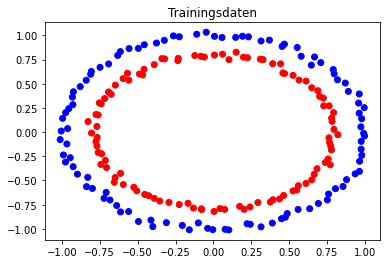

welche Form hat das Netz z.B. 5,3 5,3
[5, 3]
Netz ist: [5, 3] , solver: lbfgs , activation: relu , von 1 bis 200


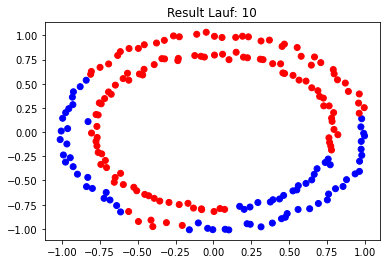

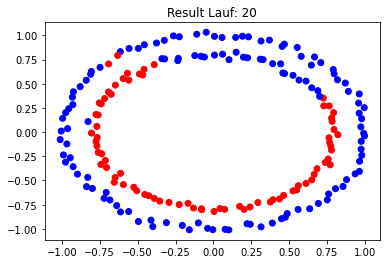

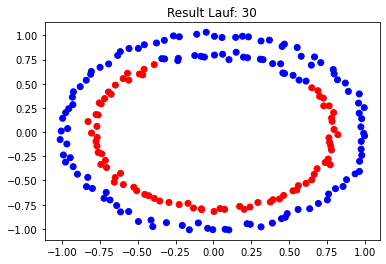

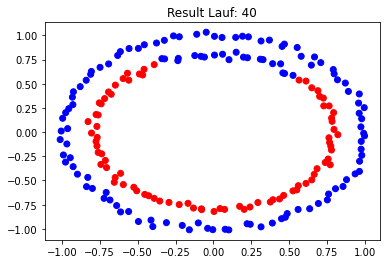

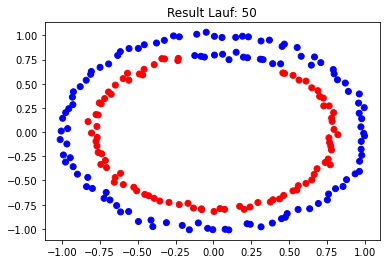

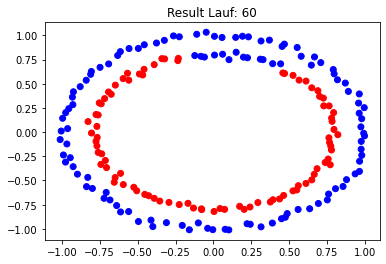

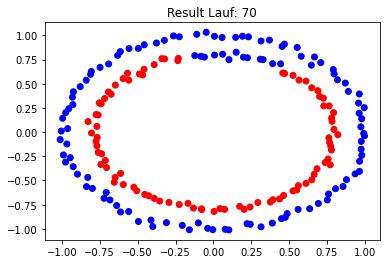

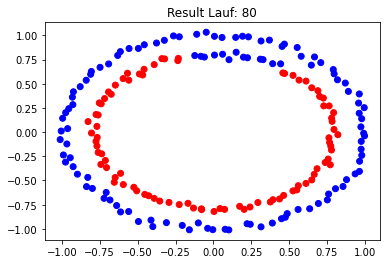

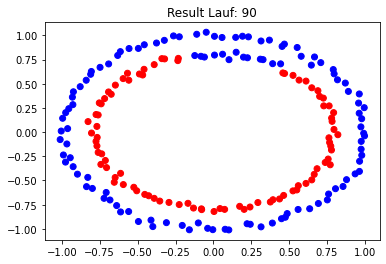

Accuracy: 0.935


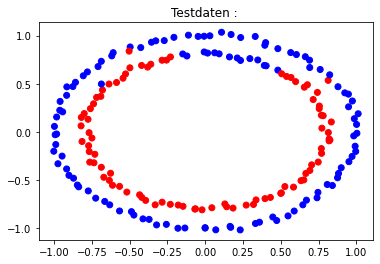

Accuracy: 0.915


In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

X_train,y_train = datasets.make_circles(n_samples=200,noise=.02)
colormap=np.array(["blue","red"])
plt.title("Trainingsdaten")
plt.scatter(X_train[:,0],X_train[:,1],c=colormap[y_train])
plt.show()

geo=[int(x) for x in input("welche Form hat das Netz z.B. 5,3 ").split(",")]
print(geo)
    
print(f"Netz ist: {geo} , solver: lbfgs , activation: relu , von 1 bis 200")

for x in range(10,100,10): # hier Lernen mit schrittweise gesteigerten Durchläufen
    
    clf = MLPClassifier(activation="relu",solver="lbfgs",hidden_layer_sizes=geo,random_state=1, max_iter=x).fit(X_train, y_train)
    result=clf.predict(X_train)
    result.reshape(200,1)
    plt.title(f"Result Lauf: {x}")
    plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result])
    plt.show()
    
print(f"Accuracy: {clf.score(X_train, y_train)}")    

X_test,y_test = datasets.make_circles(n_samples=200,noise=.02)
result=clf.predict(X_test)
result.reshape(200,1)
plt.title(f"Testdaten : ")
plt.scatter(X_test[:,0],X_test[:,1],c=colormap[result])
plt.show()
print(f"Accuracy: {clf.score(X_test, y_test)}")



Wenn wir dagegen ein genauso kleines Netz wie unser Mininetz aufbauen, gelingt auch dem MPL-Klassifizierer nur eine lineare Trennung.

Wir wollen nun die Entscheidungsflächen im Verlauf besser zeigen.

welche Form hat das Netz z.B. 5,3 5,4
[5, 4]
Netz ist: [5, 4] , solver: lbfgs , activation: relu , von 1 bis 200


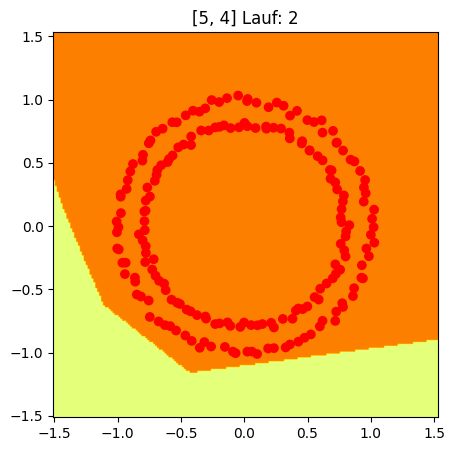

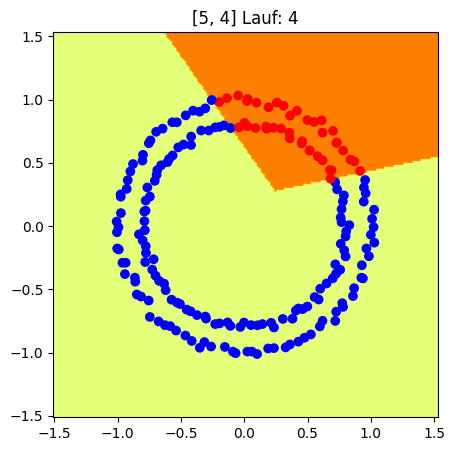

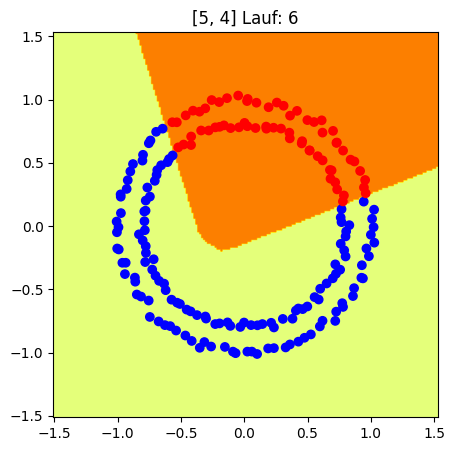

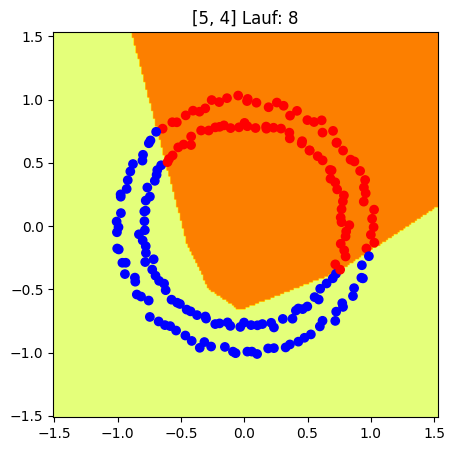

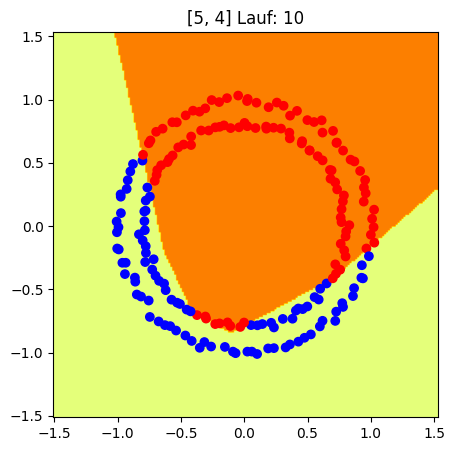

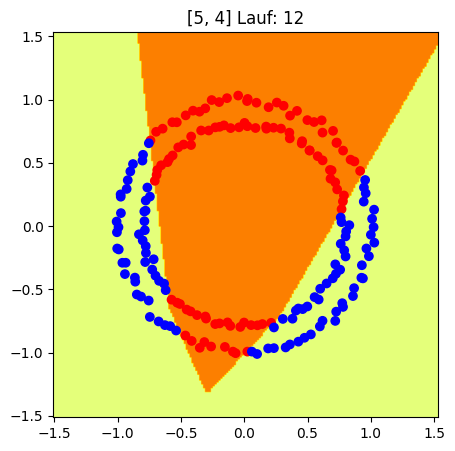

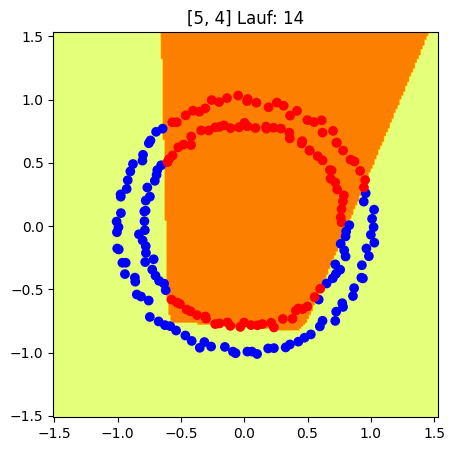

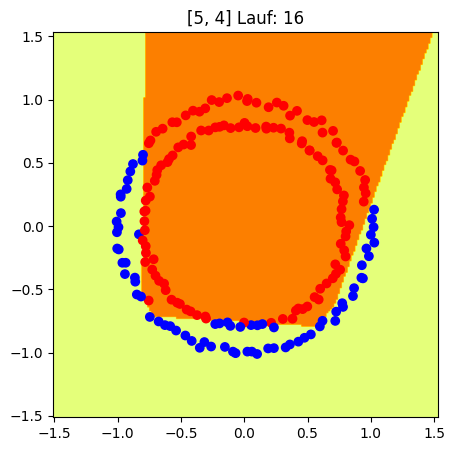

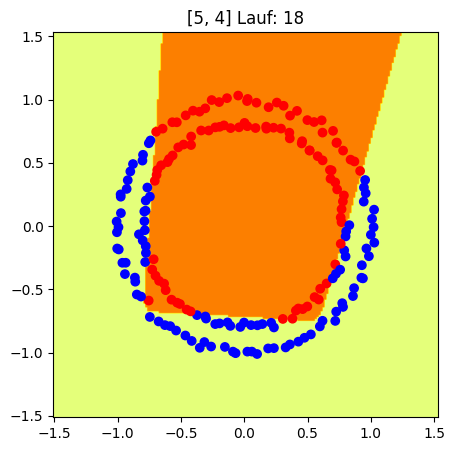

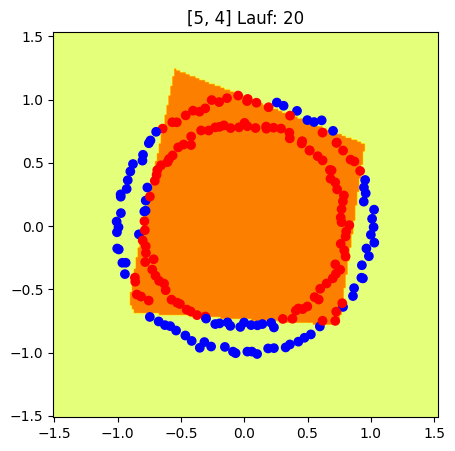

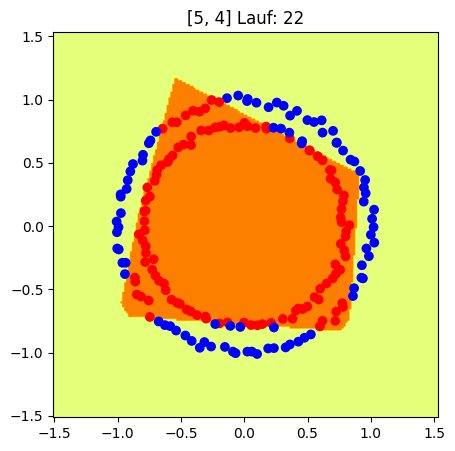

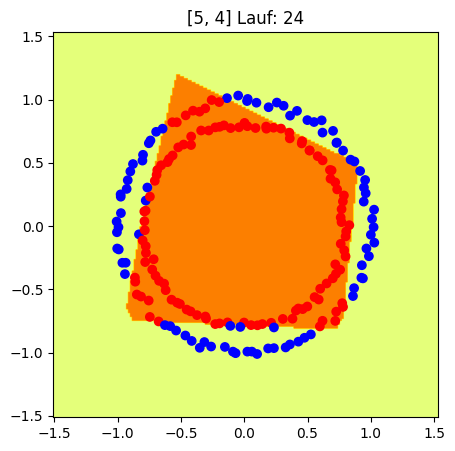

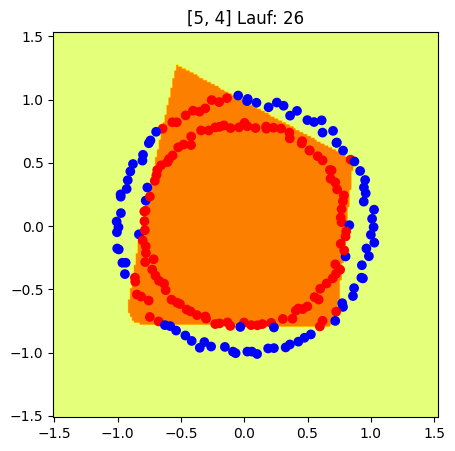

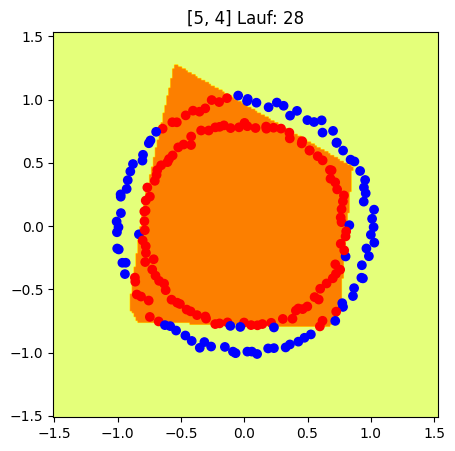

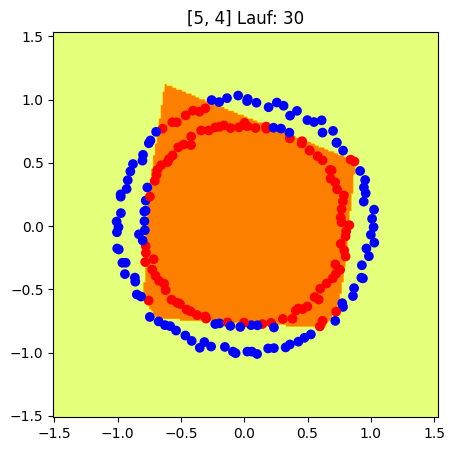

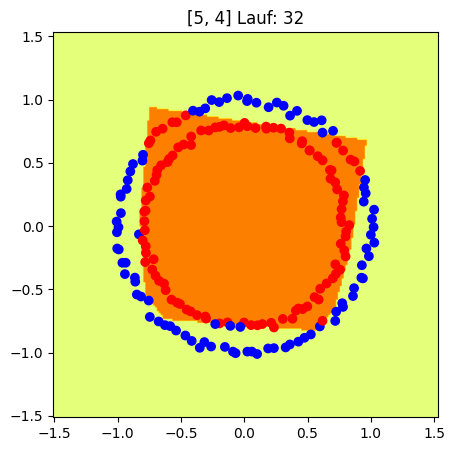

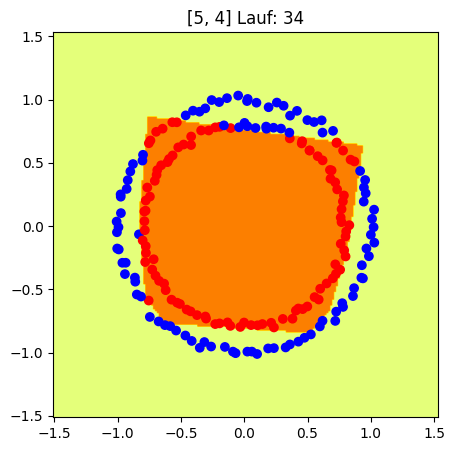

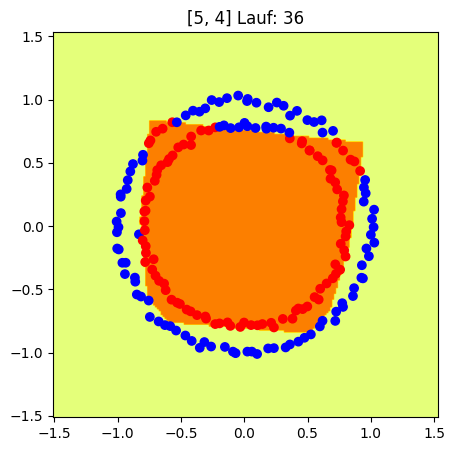

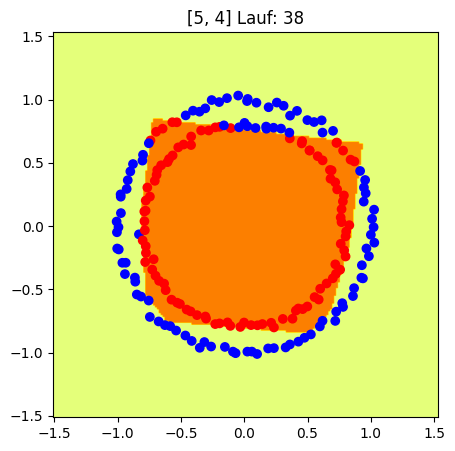

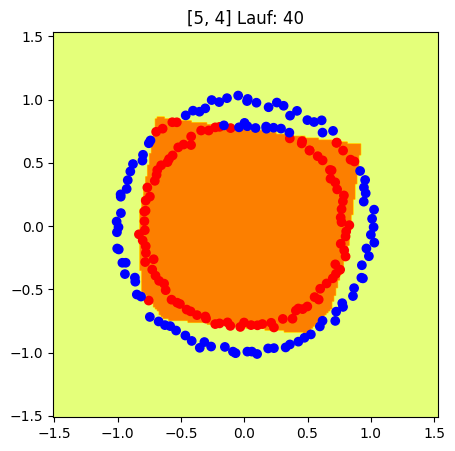

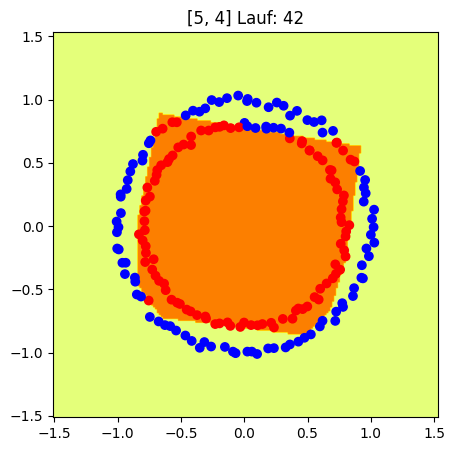

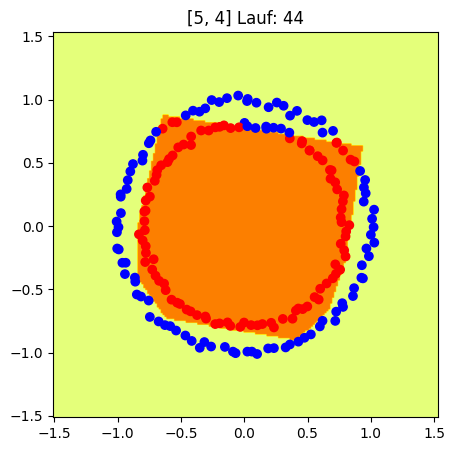

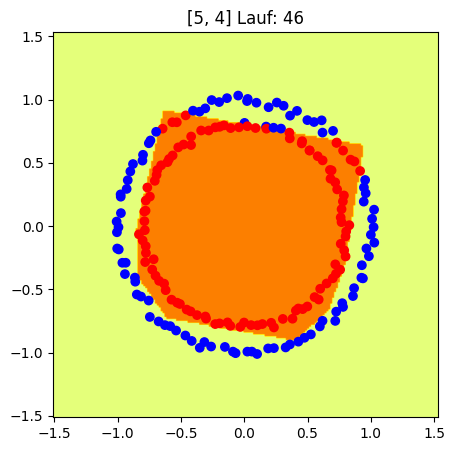

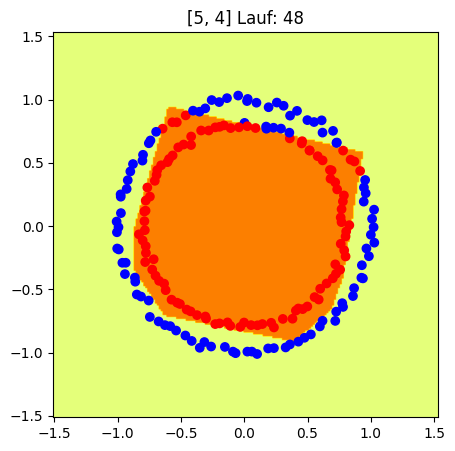

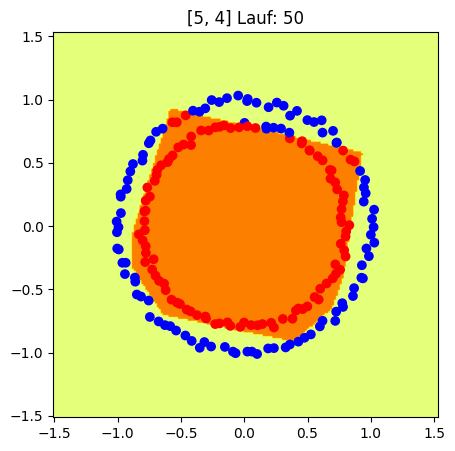

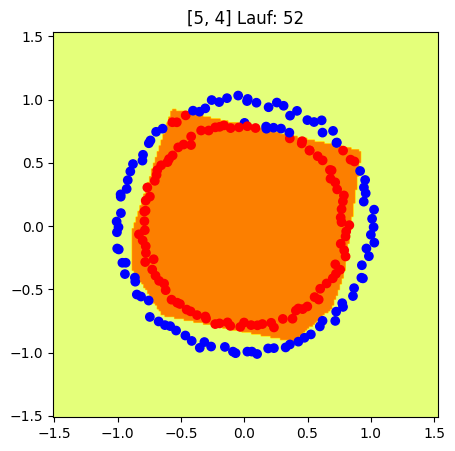

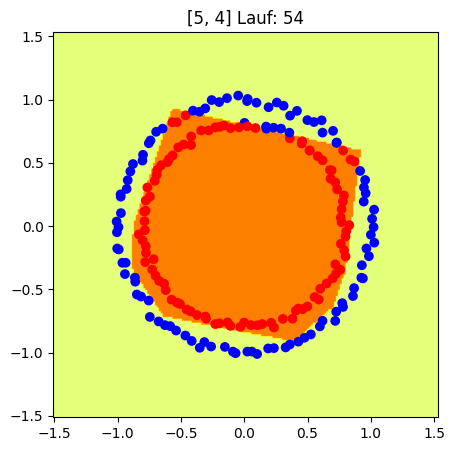

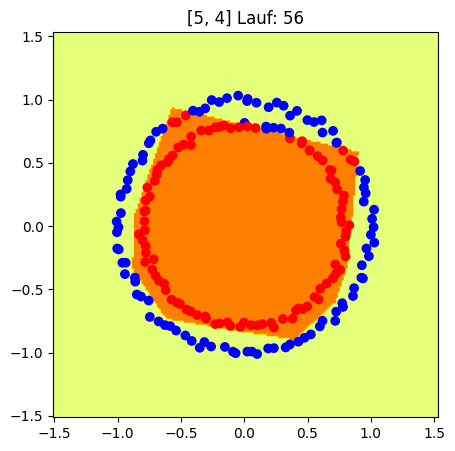

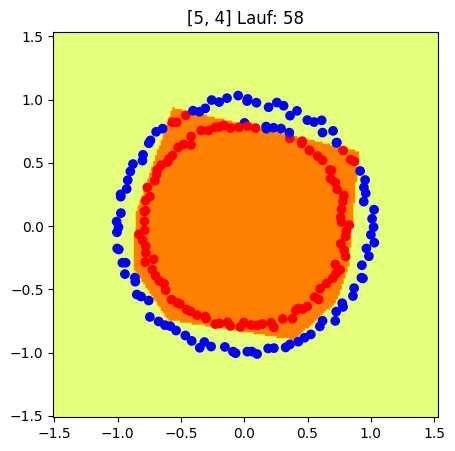

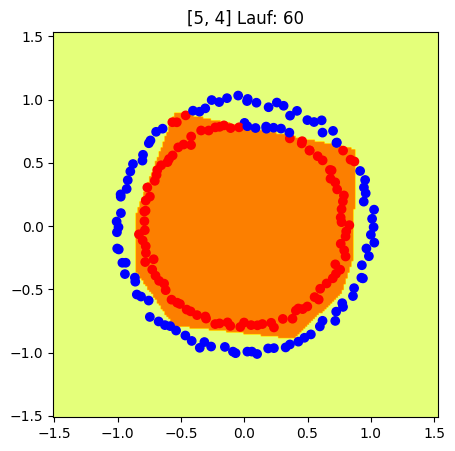

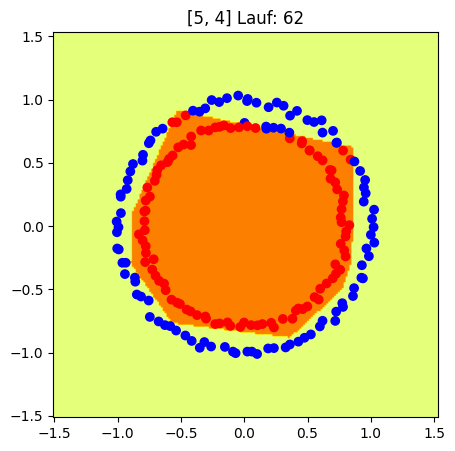

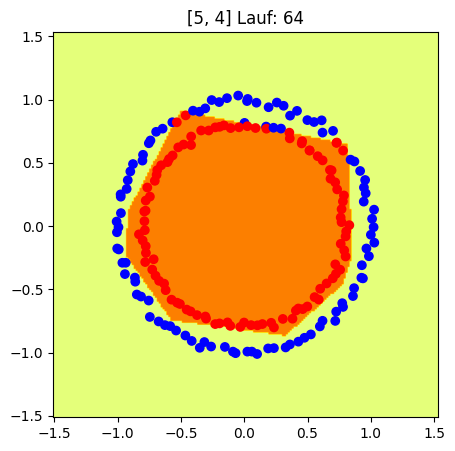

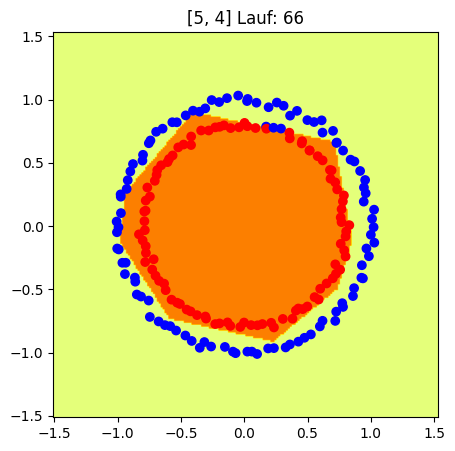

x 67 [5, 4]
Accuracy: 1.0 [5, 4]


In [1]:

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning
import sys
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
def plot_background_image(f, xres=200, yres=200, extent = (-1.2,2.2,-1.2,2.2)):
    left,right,bottom,top = extent
    x_values=np.linspace(left,right,xres)
    y_values=np.linspace(bottom,top,yres)
    x1,y1=np.meshgrid(x_values,y_values)
    pixels=xres*yres
    x1 = x1.reshape(pixels,1)
    y1 = y1.reshape(pixels,1)
    X_grid=np.column_stack((x1, y1))
    Z=f(X_grid).reshape(xres,yres)
    plt.imshow(Z,origin="lower",extent=extent, cmap="Wistia")
#Plotgröße setzen (sonst unterschiedlich große Plots wenn plot_background_image nicht immer verwendet wird)
plt.rcParams["figure.figsize"]=5,5

X_train,y_train = datasets.make_circles(n_samples=200,noise=.02)
colormap=np.array(["blue","red"])

geo=[int(x) for x in input("welche Form hat das Netz z.B. 5,3 ").split(",")]
print(geo)
    
print(f"Netz ist: {geo} , solver: lbfgs , activation: relu , von 1 bis 200")


von=1
bis=200
activation="relu"
solver="lbfgs"
Xmin,Xmax,Ymin,Ymax=np.min(X_train[:,0])-.5,np.max(X_train[:,0])+.5,np.min(X_train[:,1])-.5,np.max(X_train[:,1])+.5
for x in range(von,bis): # hier Lernen mit schrittweise gestigerten Durchläufen

    clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=geo,random_state=1, max_iter=x).fit(X_train, y_train)
        
    if clf.score(X_train,y_train)==1.0:
        print("x",x,geo)
        break
    plot_background_image(clf.predict,extent=(Xmin,Xmax,Ymin,Ymax))

    result=clf.predict(X_train)
    result.reshape(200,1)
    if x%2==0:
        plt.title(f"{geo} Lauf: {x}")
        plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result])
        plt.show()
    
print(f"Accuracy: {clf.score(X_train, y_train)} {geo}")


Wir können nochmal eine andere Datenstruktur probieren.

welche Form hat das Netz z.B. 5,3 10,10
[10, 10]
Netz ist: [10, 10] , solver: lbfgs , activation: relu , von 1 bis 200


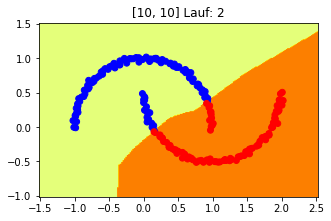

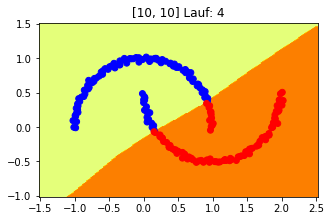

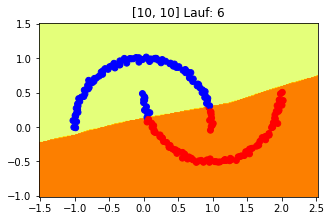

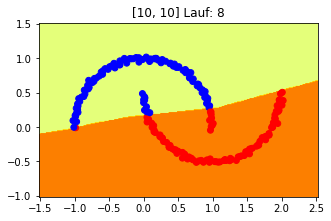

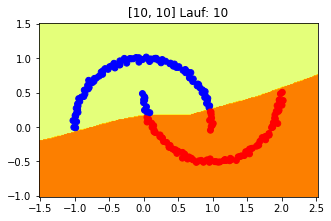

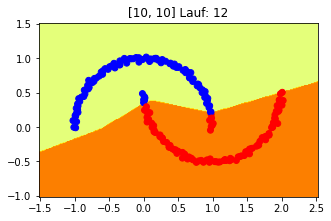

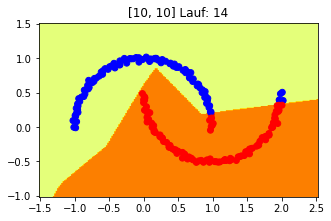

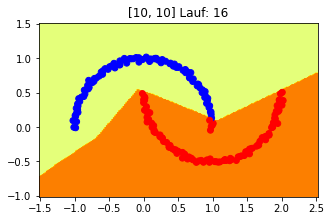

x 17 [10, 10]
Accuracy: 1.0 [10, 10]


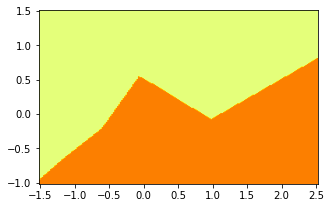

In [4]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
def plot_background_image(f, xres=200, yres=200, extent = (-1.2,2.2,-1.2,2.2)):
    left,right,bottom,top = extent
    x_values=np.linspace(left,right,xres)
    y_values=np.linspace(bottom,top,yres)
    x1,y1=np.meshgrid(x_values,y_values)
    pixels=xres*yres
    x1 = x1.reshape(pixels,1)
    y1 = y1.reshape(pixels,1)
    X_grid=np.column_stack((x1, y1))
    Z=f(X_grid).reshape(xres,yres)
    plt.imshow(Z,origin="lower",extent=extent, cmap="Wistia")
#Plotgröße setzen (sonst unterschiedlich große Plots wenn plot_background_image nicht immer verwendet wird)
plt.rcParams["figure.figsize"]=5,5

X_train,y_train = datasets.make_moons(n_samples=200,noise=.02)
colormap=np.array(["blue","red"])

geo=[int(x) for x in input("welche Form hat das Netz z.B. 5,3 ").split(",")]
print(geo)
    
print(f"Netz ist: {geo} , solver: lbfgs , activation: relu , von 1 bis 200")


von=1
bis=200
activation="relu"
solver="lbfgs"
Xmin,Xmax,Ymin,Ymax=np.min(X_train[:,0])-.5,np.max(X_train[:,0])+.5,np.min(X_train[:,1])-.5,np.max(X_train[:,1])+.5
for x in range(von,bis): # hier Lernen mit schrittweise gestigerten Durchläufen

    clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=geo,random_state=1, max_iter=x).fit(X_train, y_train)
        
    
    plot_background_image(clf.predict,extent=(Xmin,Xmax,Ymin,Ymax))

    result=clf.predict(X_train)
    result.reshape(200,1)
    if x%2==0:
        plt.title(f"{geo} Lauf: {x}")
        plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result])
        plt.show()
    if abs(clf.score(X_train,y_train)-1.0)<1e-6:
        print("x",x,geo)
        break
    
print(f"Accuracy: {clf.score(X_train, y_train)} {geo}")

Wir wollen jetzt prüfen, diesmal am Beispiel der 2 Monde mit 200 Punkten, wie sich die einzelnen Parameter Netzstruktur, Aktivierungsfunktion, Lernrate und Lösungsalgorithmus auf die Performance unseres neuronalen Netzes auswirkt. Wir lassen maximal 200 Durchgänge zu und bestimmen dann <b>die Accuracy des Netzes. Wenn vorher 100% erreicht werden, geben wir die Anzahl der dafür nötigen Durchgänge an.</b> Zunächst die Geometrie des Netzes.

In [22]:

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import train_test_split
X_moons,y_moons = datasets.make_moons(n_samples=300,noise=.2)
data_sets = train_test_split(X_moons, y_moons,                             
                             test_size=0.30,
                             random_state=700)
data_train, data_test, targets_train, targets_test = data_sets
#print(data_train,targets_train)
von=1
bis=150
activation="relu"
solver="lbfgs"    
print("solver: lbfgs , activation: relu , von 1 bis 150 \n\n")
for geo in [(2,15,15,15),(4,15,15,15),(4,15,15),(8,15),(2,50,50),(128,8),(8,40,40),(8,40,40,40,40,40)]:                                                                                
    print(f"Netz ist: {str(geo):<20}",end ='' )
    

    for x in range(von,bis): # hier Lernen mit schrittweise gestigerten Durchläufen

        clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=geo,random_state=42, max_iter=x).fit(data_train, targets_train)
        if clf.score(data_train,targets_train) >.999:
            break
    print(f"\nAccuracy Trainingsdaten: {clf.score(data_train, targets_train):4.2f} ")
    print(f"Accuracy Testdaten: {clf.score(data_test, targets_test):4.2f}  Läufe:{x}\n")

solver: lbfgs , activation: relu , von 1 bis 150 


Netz ist: (2, 15, 15, 15)     
Accuracy Trainingsdaten: 0.87 
Accuracy Testdaten: 0.83  Läufe:149

Netz ist: (4, 15, 15, 15)     
Accuracy Trainingsdaten: 0.98 
Accuracy Testdaten: 1.00  Läufe:149

Netz ist: (4, 15, 15)         
Accuracy Trainingsdaten: 0.99 
Accuracy Testdaten: 0.99  Läufe:149

Netz ist: (8, 15)             
Accuracy Trainingsdaten: 0.99 
Accuracy Testdaten: 0.99  Läufe:149

Netz ist: (2, 50, 50)         
Accuracy Trainingsdaten: 0.89 
Accuracy Testdaten: 0.89  Läufe:149

Netz ist: (128, 8)            
Accuracy Trainingsdaten: 1.00 
Accuracy Testdaten: 0.91  Läufe:120

Netz ist: (8, 40, 40)         
Accuracy Trainingsdaten: 0.99 
Accuracy Testdaten: 1.00  Läufe:149

Netz ist: (8, 40, 40, 40, 40, 40)
Accuracy Trainingsdaten: 0.98 
Accuracy Testdaten: 0.98  Läufe:149



Wenn die Grösse des ersten Layers klein ist, ist das Netz nie optimal, egal wie viele weiteren Layer wir einführen und wie gross diese sind. Erst bei vier Neuronen im  ersten Layer wird ein weiteres "grosses Netz" sicher zum Erfolg führen. Ab acht Neuronen im ersten Layer haben wir immer Erfolg, eine Vergrösserung des ersten Layers steigert diesen nicht, wenn wir die nachfolgenden Layer nicht sehr klein wählen, wie bei 128 ¦ 4 ¦ 2 haben wir mit sovielen Neuronen im ersten Layer immer Erfolg. Erstaunlich ist, das z.B. bei 8 ¦ 40 ¦ 40 weitere Layer zu einer Verschlechterung führen!
Es ist also wichtig, die Anzahl der Neuronen im ersten hidden layer in etwa mindestens 2 mal so gross zu machen wie die Zahl der Eingänge (besser grösser) und das(die) nachfolgenden Layer nicht zu klein zu machen. Eine Übersicht zeigt die Tabelle unten, bei den grossen Zahlen von Neuronen kommt es zu beträchtlichen Laufzeiten.

<br><br><img width=500 height=500 src="Images/Table1.png"  /> 

Bei der Aktivierungsfunktion zeigt sich , dass das Netz mit der ohne Aktivierungsfunktion (identity) am schlechtesten lernt, relu dauert lange und logistic sowie tanh sind schnell. Die Wahl der Aktivierungsfunktion ist also sehr wichtig und muss stimmen.

Netz ist: [5, 3] , solver: lbfgs , activation: identity , von 1 bis 200


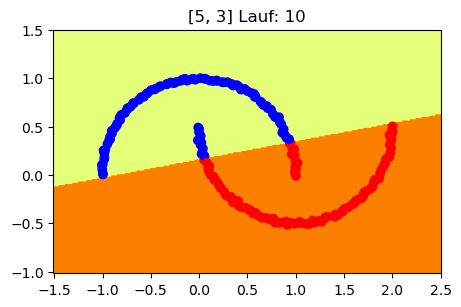

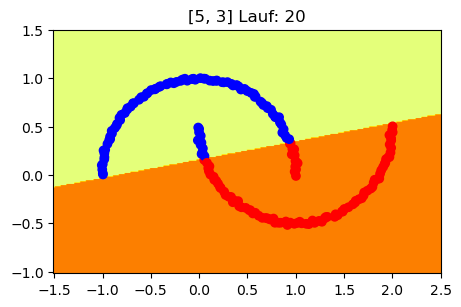

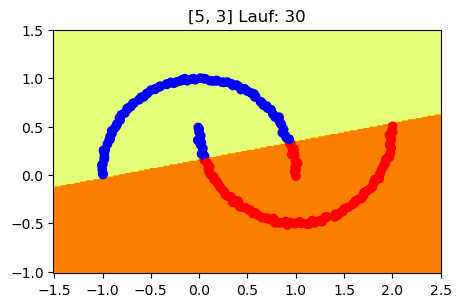

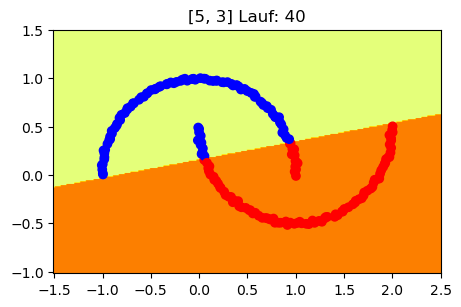

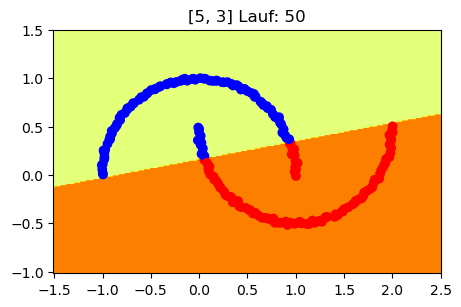

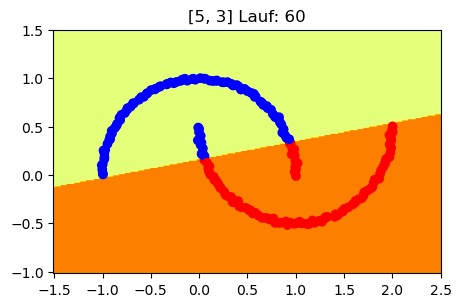

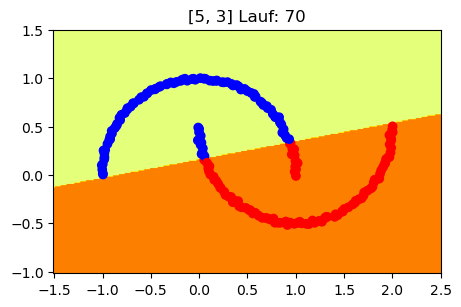

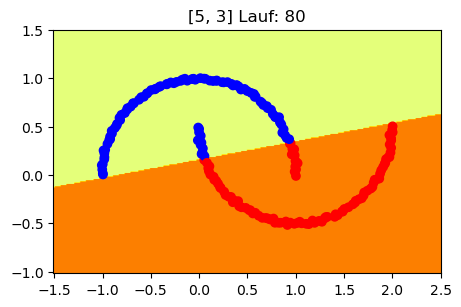

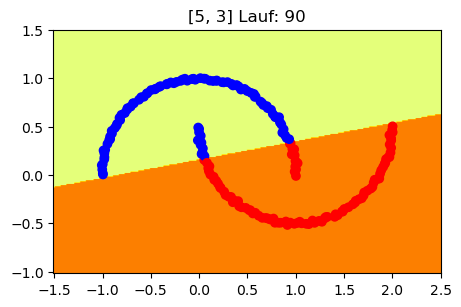

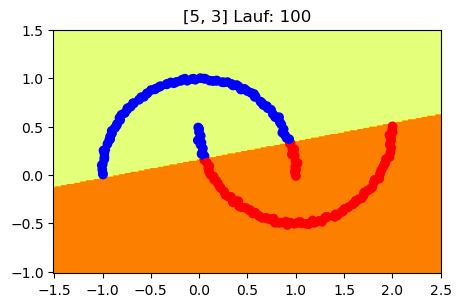

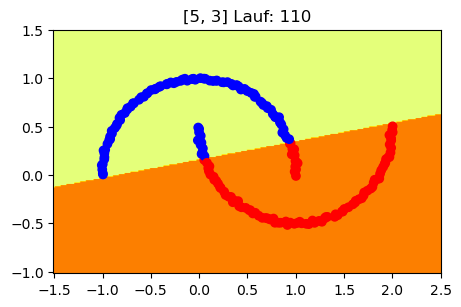

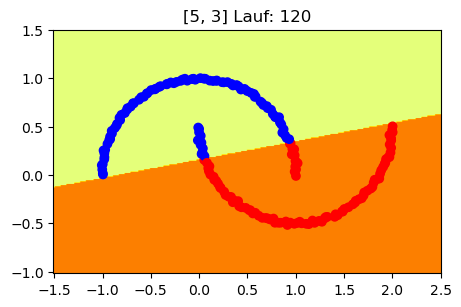

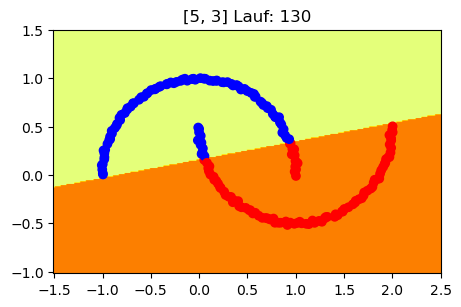

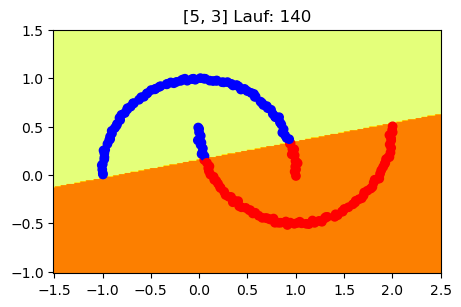

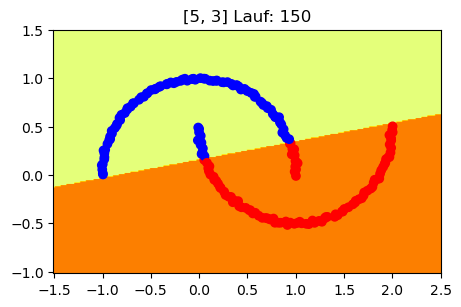

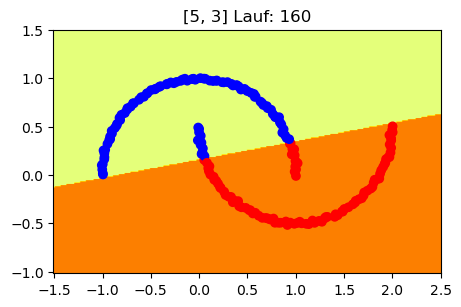

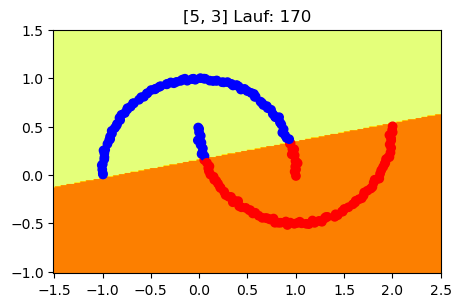

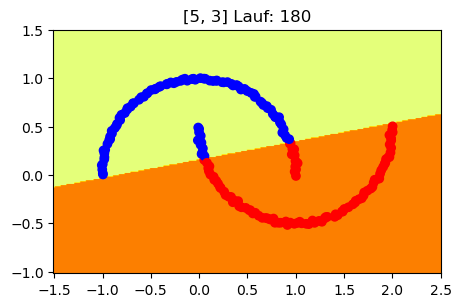

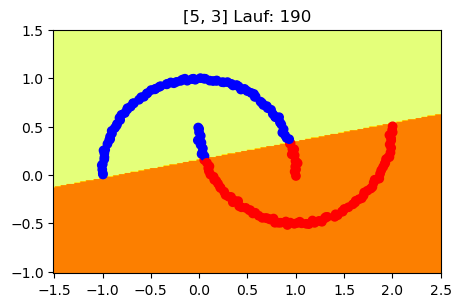

Accuracy: 0.885 [5, 3]
Netz ist: [5, 3] , solver: lbfgs , activation: tanh , von 1 bis 200


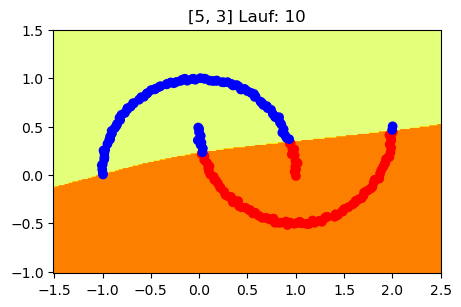

x 19 [5, 3]


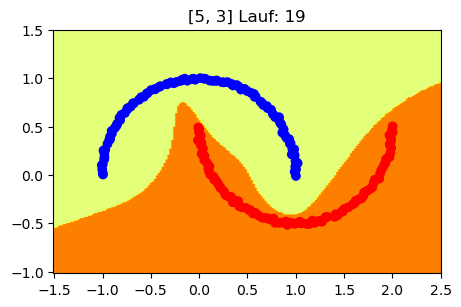

Accuracy: 1.0 [5, 3]
Netz ist: [5, 3] , solver: lbfgs , activation: logistic , von 1 bis 200


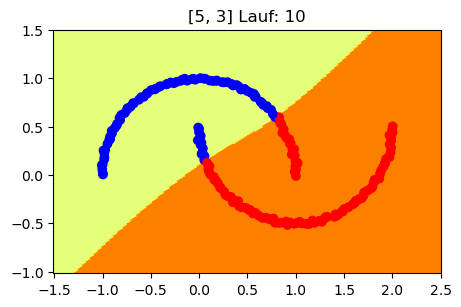

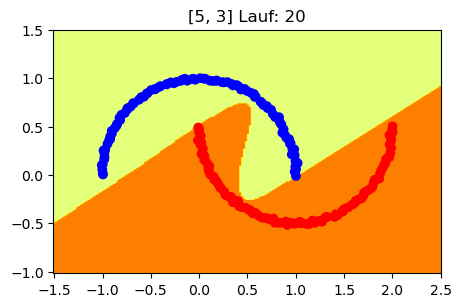

x 20 [5, 3]


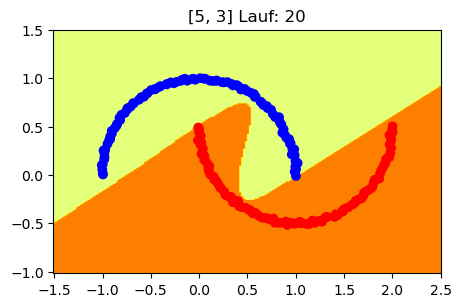

Accuracy: 1.0 [5, 3]
Netz ist: [5, 3] , solver: lbfgs , activation: relu , von 1 bis 200


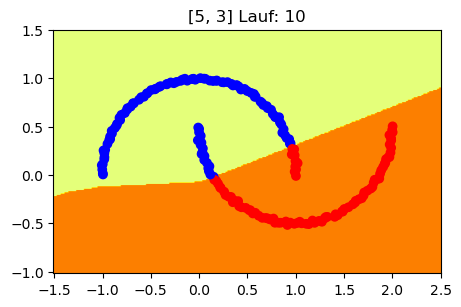

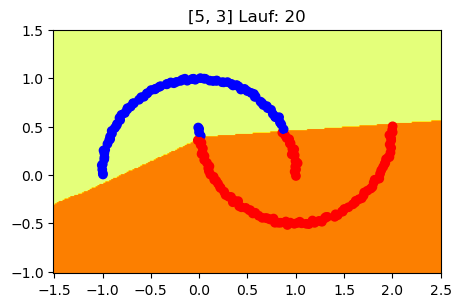

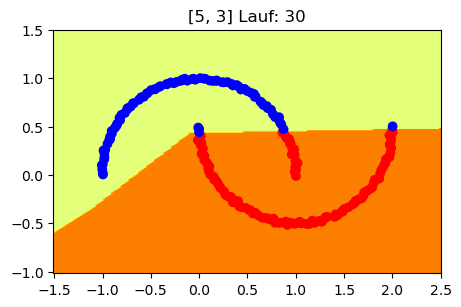

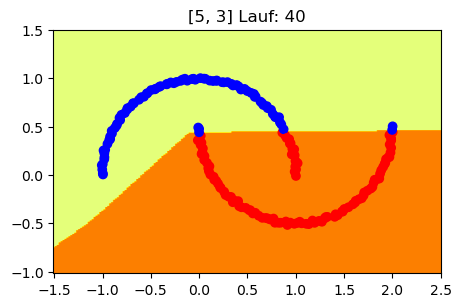

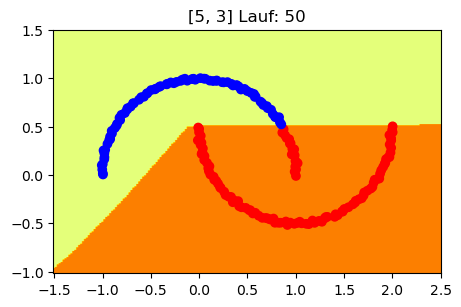

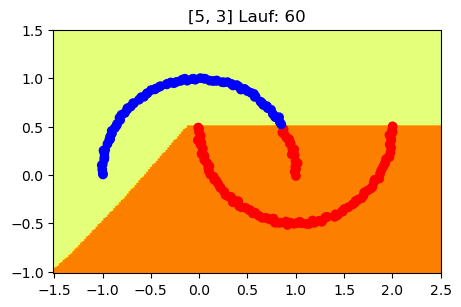

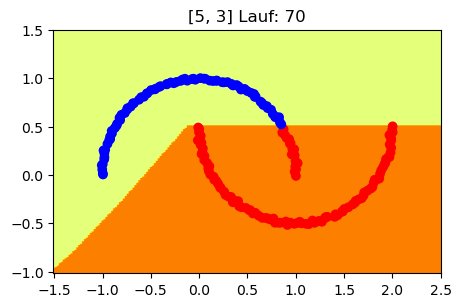

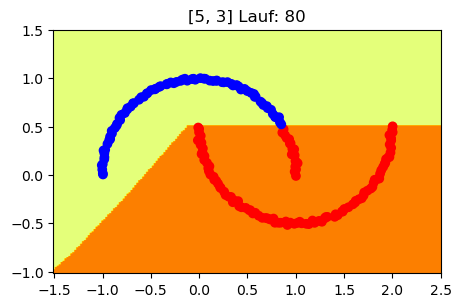

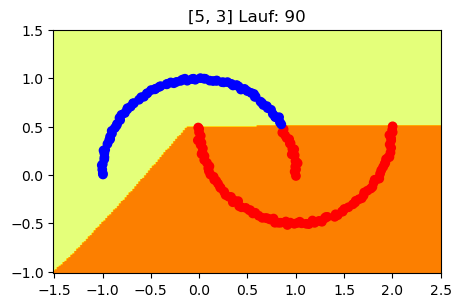

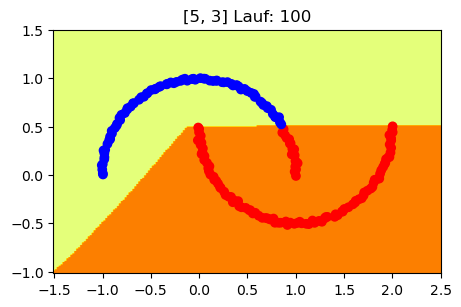

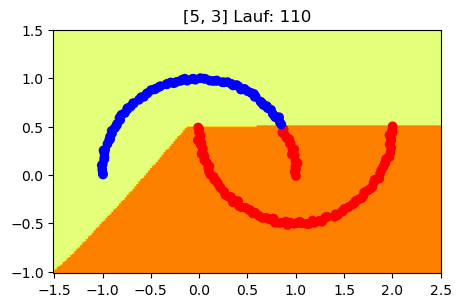

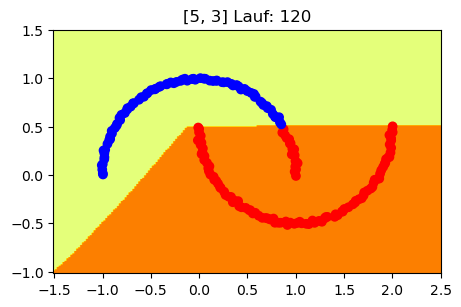

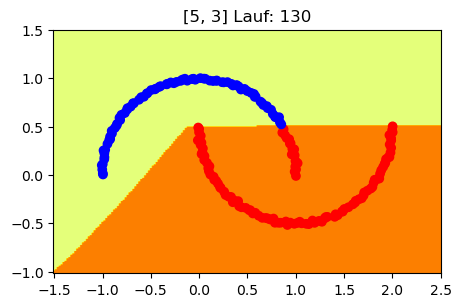

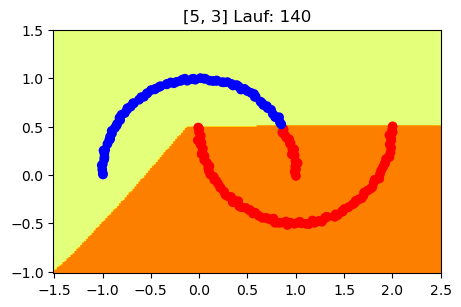

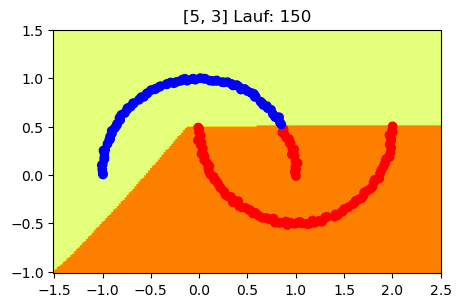

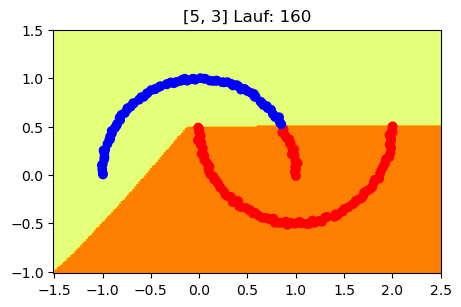

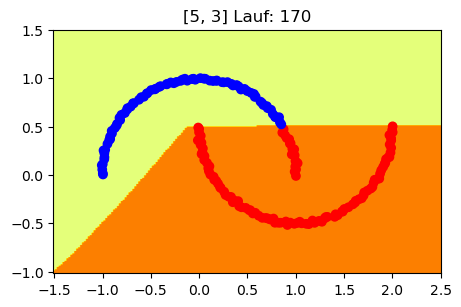

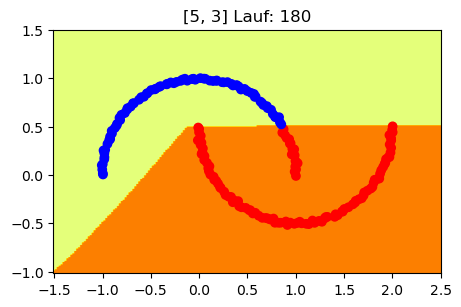

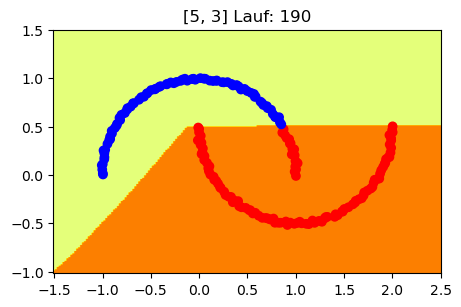

Accuracy: 0.915 [5, 3]


In [26]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
def plot_background_image(f, xres=200, yres=200, extent = (-1.2,2.2,-1.2,2.2)):
    left,right,bottom,top = extent
    x_values=np.linspace(left,right,xres)
    y_values=np.linspace(bottom,top,yres)
    x1,y1=np.meshgrid(x_values,y_values)
    pixels=xres*yres
    x1 = x1.reshape(pixels,1)
    y1 = y1.reshape(pixels,1)
    X_grid=np.column_stack((x1, y1))
    Z=f(X_grid).reshape(xres,yres)
    plt.imshow(Z,origin="lower",extent=extent, cmap="Wistia")
#Plotgröße setzen (sonst unterschiedlich große Plots wenn plot_background_image nicht immer verwendet wird)
plt.rcParams["figure.figsize"]=5,5

X_train,y_train = datasets.make_moons(n_samples=200,noise=.01)
colormap=np.array(["blue","red"])

#geo=[int(x) for x in input("welche Form hat das Netz z.B. 5,3 ").split(",")]
#print(geo)
geo = [5,3]    



von=1
bis=200

solver="lbfgs"
Xmin,Xmax,Ymin,Ymax=np.min(X_train[:,0])-.5,np.max(X_train[:,0])+.5,np.min(X_train[:,1])-.5,np.max(X_train[:,1])+.5
for activation in ["identity","tanh","logistic","relu"]:
    print(f"Netz ist: {geo} , solver: lbfgs , activation: {activation} , von 1 bis 200")
    for x in range(von,bis): 

        clf = MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=geo,random_state=1, max_iter=x).fit(X_train, y_train)


        

        result=clf.predict(X_train)
        result.reshape(200,1)
        if x%10==0:
            plot_background_image(clf.predict,extent=(Xmin,Xmax,Ymin,Ymax))
            plt.title(f"{geo} Lauf: {x}")
            plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result])
            plt.show()
        if abs(clf.score(X_train,y_train)-1.0)<1e-6:
            print("x",x,geo)
            plot_background_image(clf.predict,extent=(Xmin,Xmax,Ymin,Ymax))
            plt.title(f"{geo} Lauf: {x}")
            plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result])
            plt.show()
            break

    print(f"Accuracy: {clf.score(X_train, y_train)} {geo}")
    #activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

Was ist mit dem Parameter "solver" gemeint, den wir hier auf "lbfgs" gesetzt haben? Dieser beschreibt verschiedene Methoden der Anpassung der Gewichte in unseren Lernschritten. Die wichtigsten solver sind "lbfgs" für eher kleine Netze, "adam" für  eher grosse Netze und "sgd" dazwischen. Mit "adam" läuft unser kleines Netz  schlechter. (8 ¦ 20 ¦ 20  relu adam =>190 Durchgänge).<br>Was noch fehlt ist der Einfluss der Lernrate. Diese lag bei allen unseren Versuchen bisher beim default-Wert von 0.001 und war über den Lernvorgang konstant, wurde also nicht an die Annäherung an den Zielwert unseres Netzes angepasst. Für diesen Test müssen wir den solver "adam" verwenden, da wir nur so die Lernrate verändern können. Die Ergebnisse sind also nicht mit obiger Tabelle zu vergleichen.

Netz ist: [16, 30, 30] , solver: adam , activation: tanh , learning rate = 0.0001 , von 1 bis 300


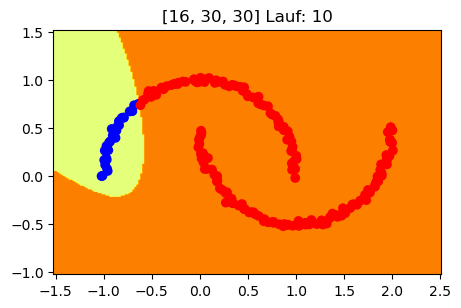

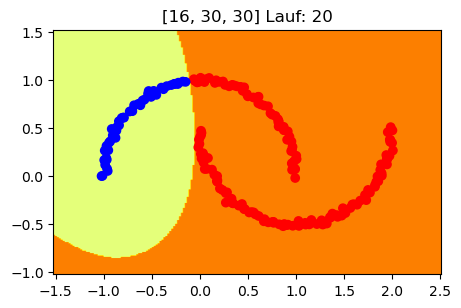

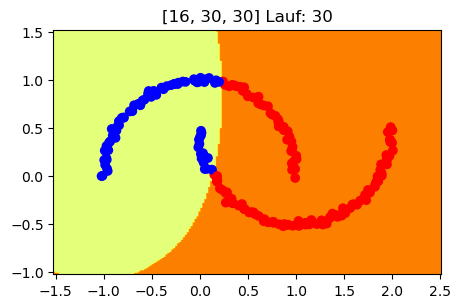

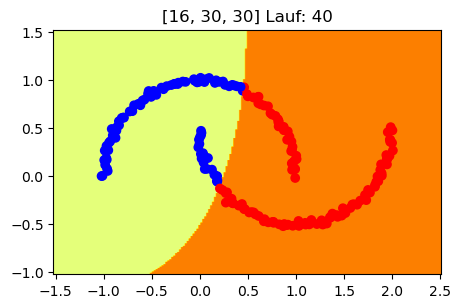

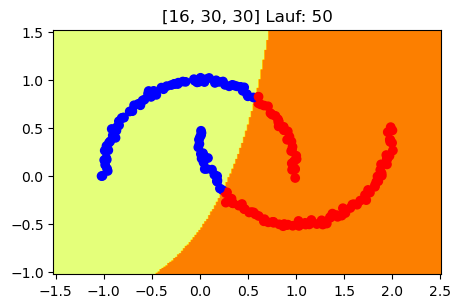

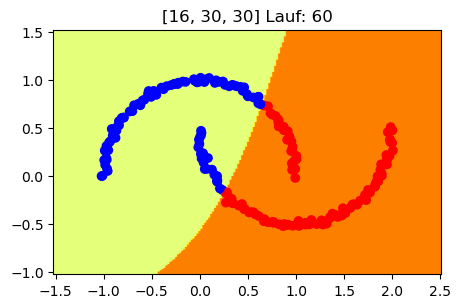

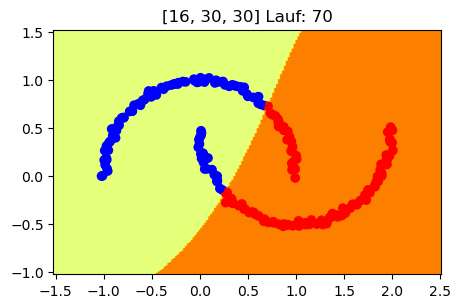

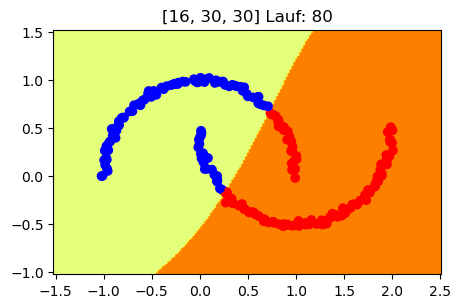

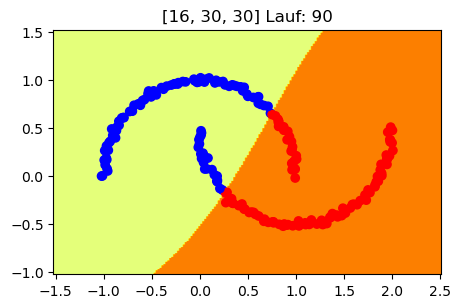

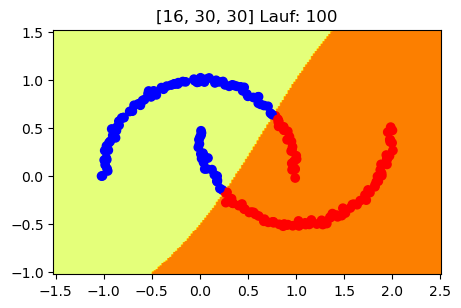

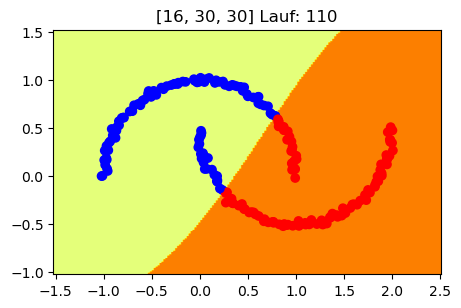

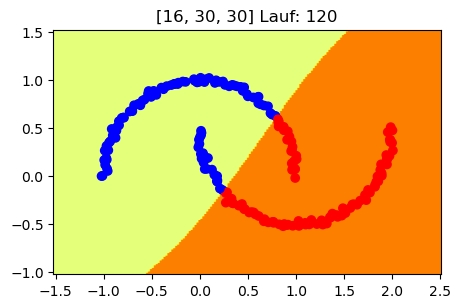

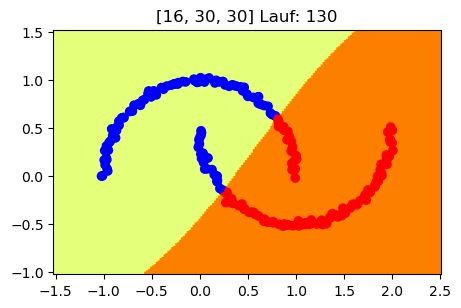

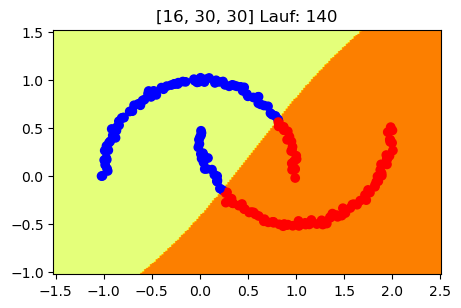

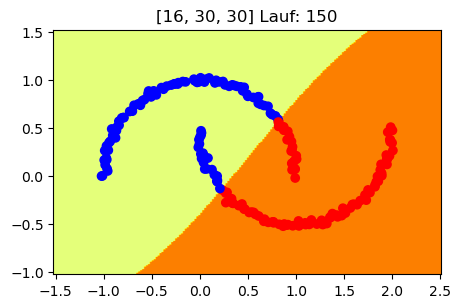

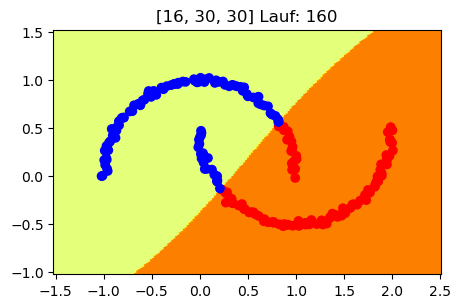

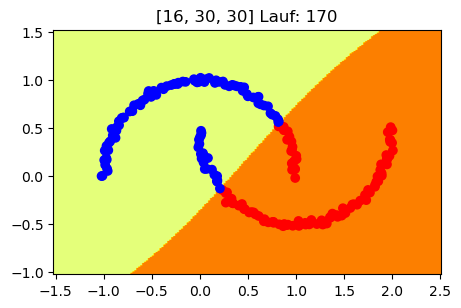

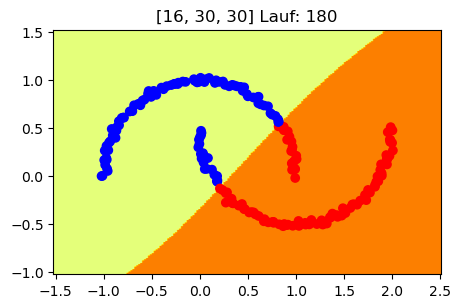

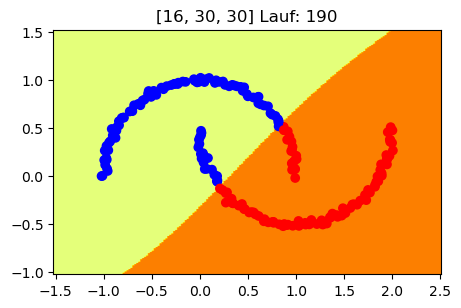

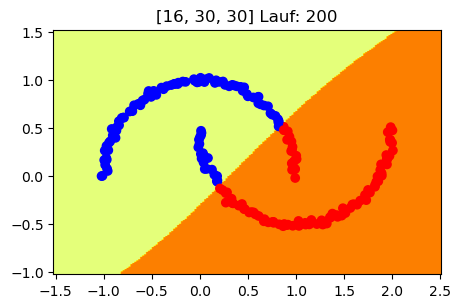

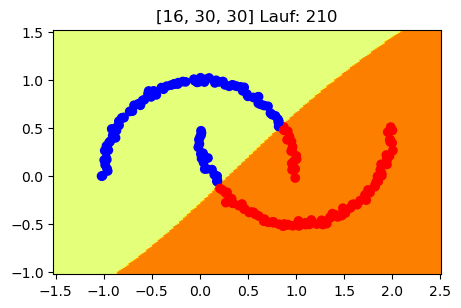

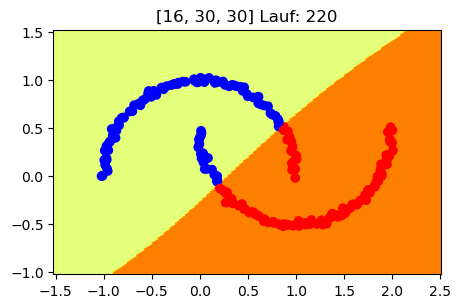

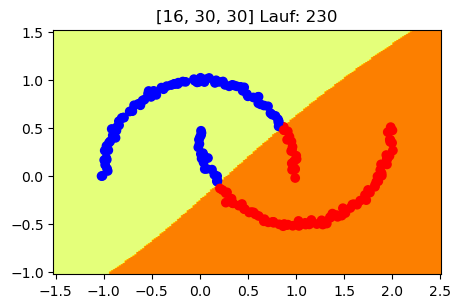

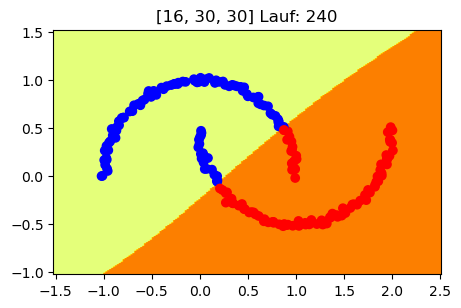

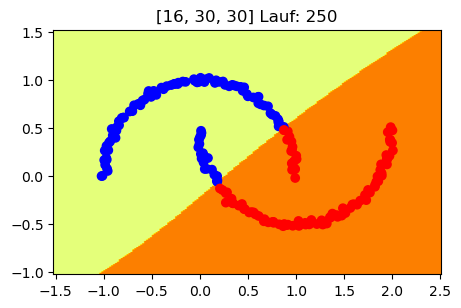

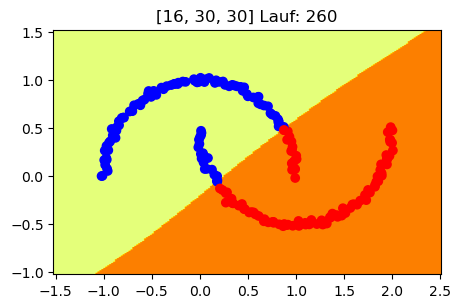

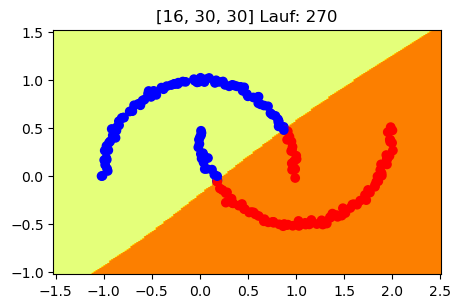

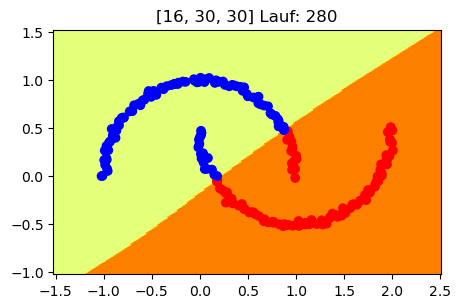

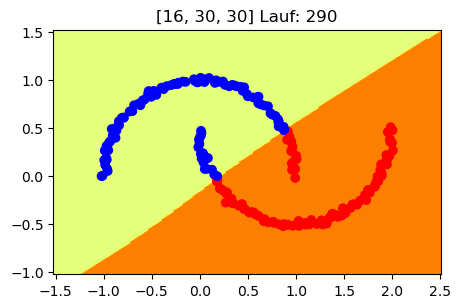

Accuracy: 0.835 [16, 30, 30]
Netz ist: [16, 30, 30] , solver: adam , activation: tanh , learning rate = 0.001 , von 1 bis 300


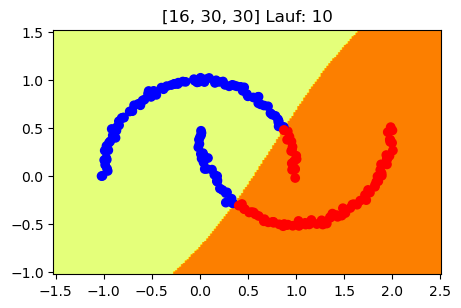

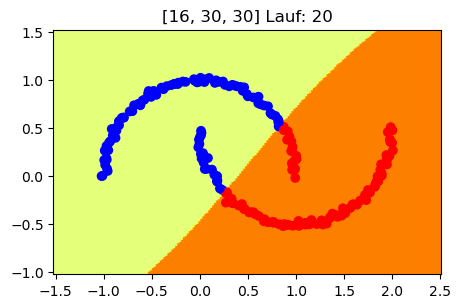

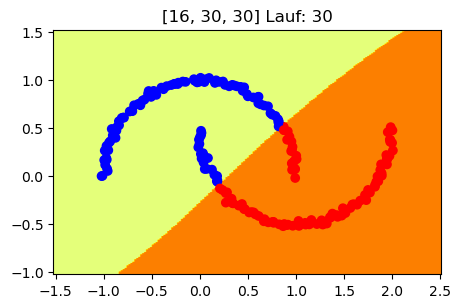

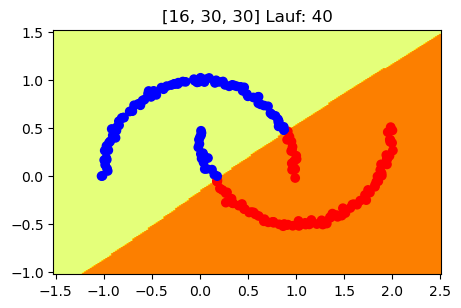

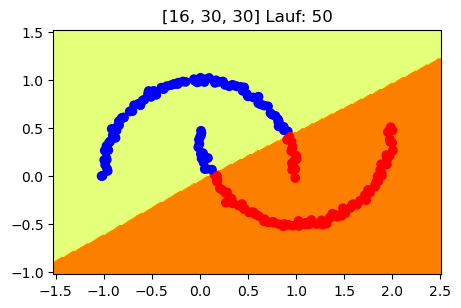

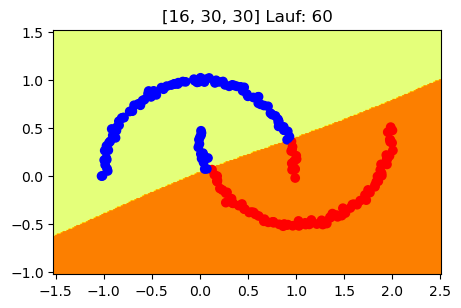

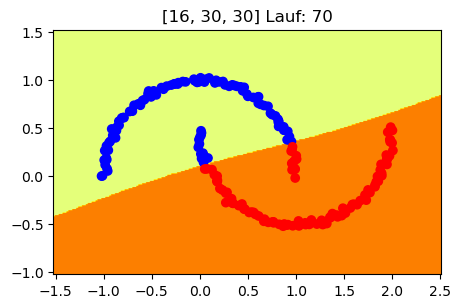

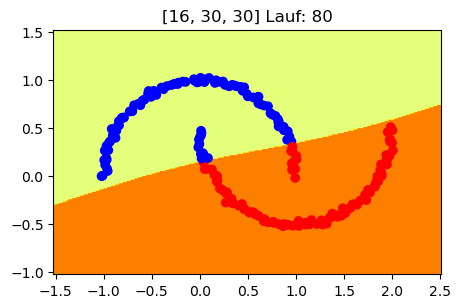

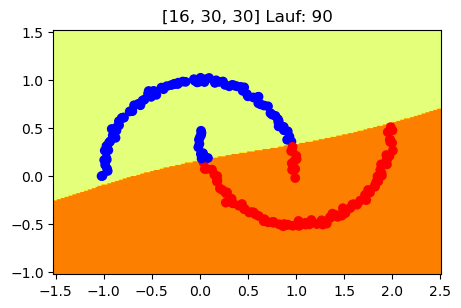

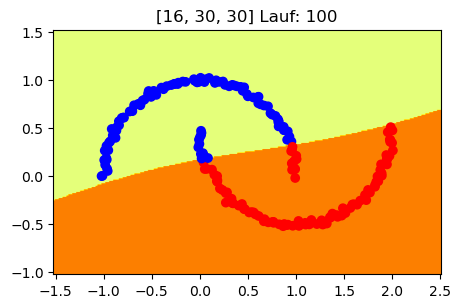

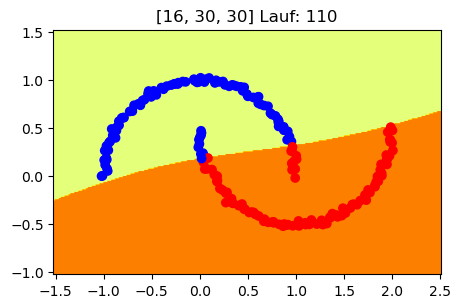

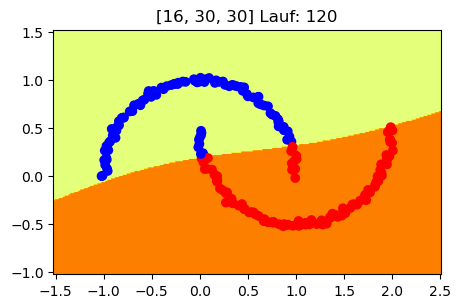

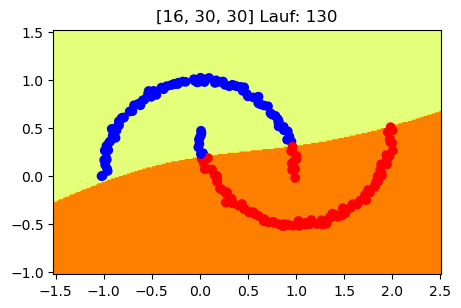

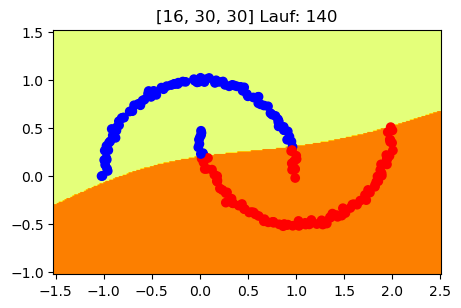

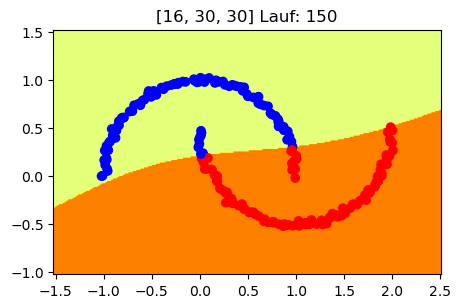

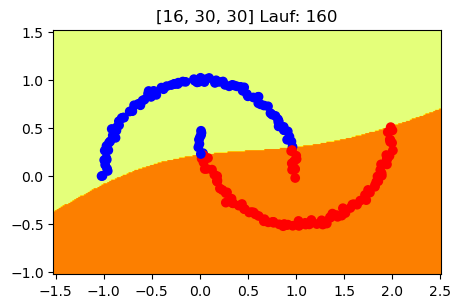

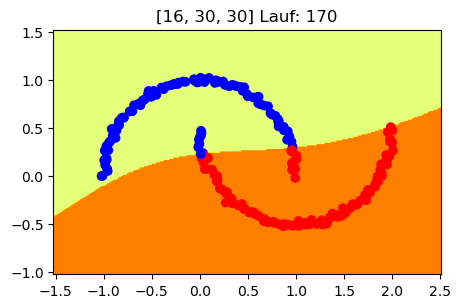

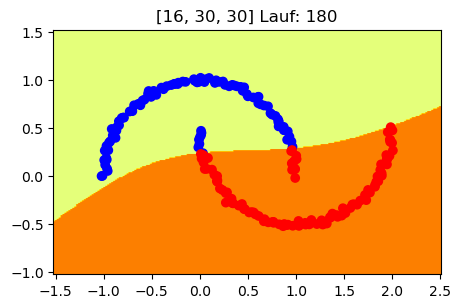

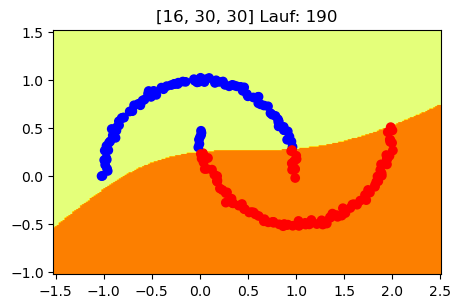

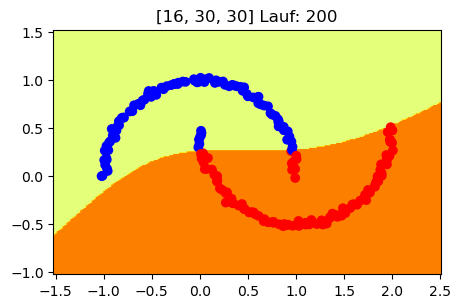

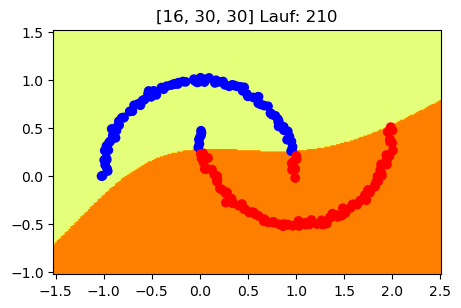

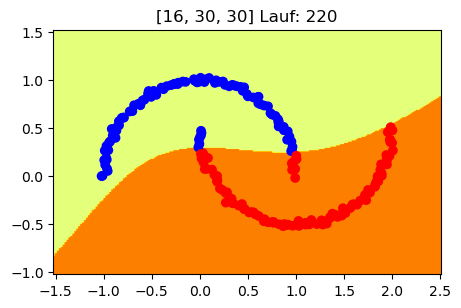

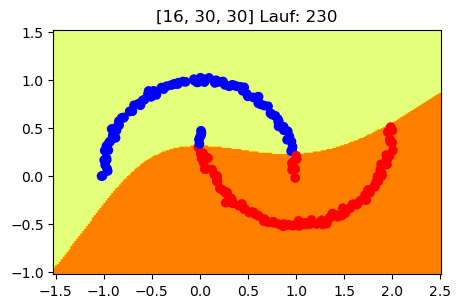

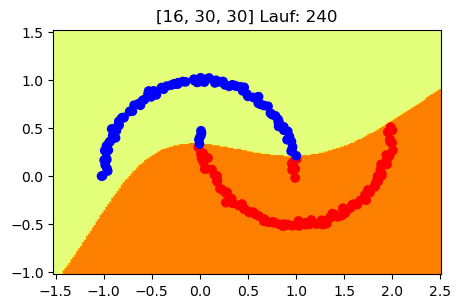

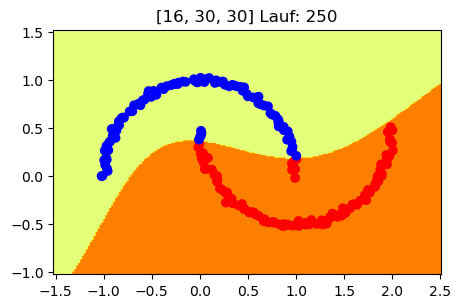

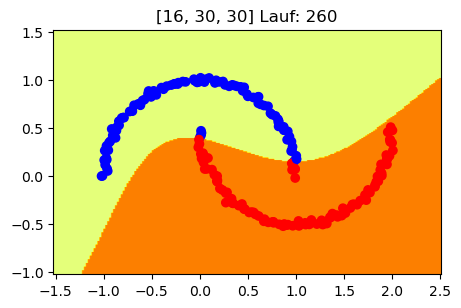

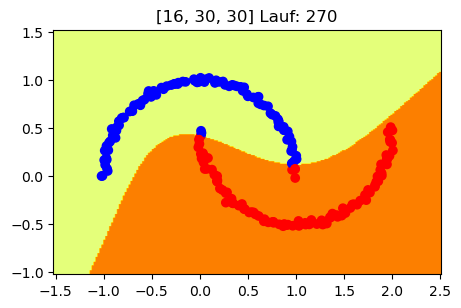

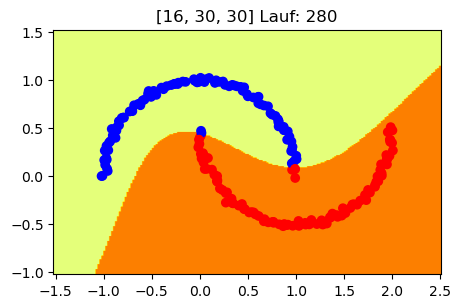

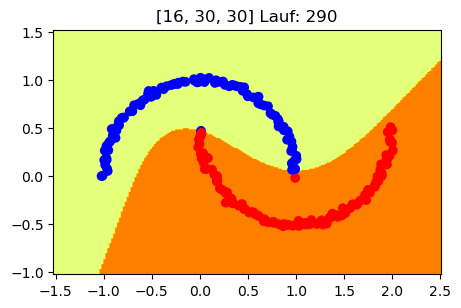

Accuracy: 0.995 [16, 30, 30]
Netz ist: [16, 30, 30] , solver: adam , activation: tanh , learning rate = 0.01 , von 1 bis 300


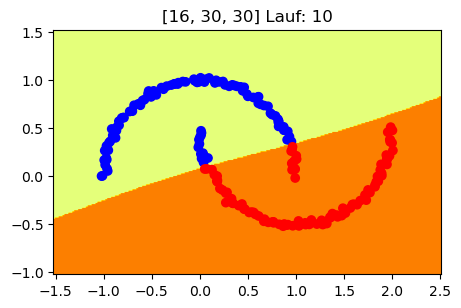

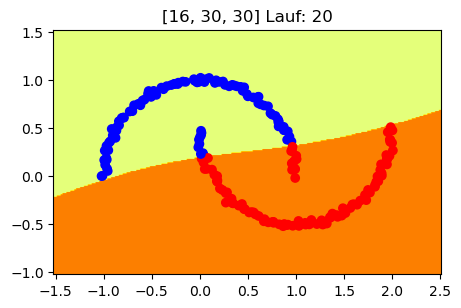

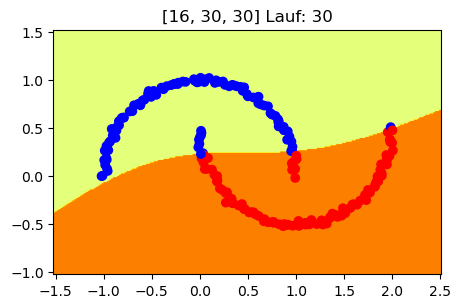

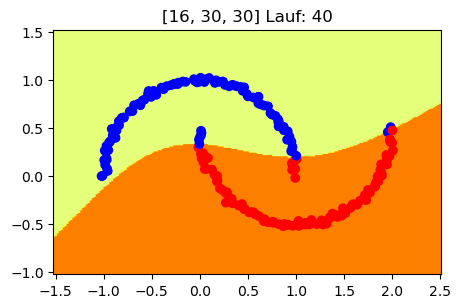

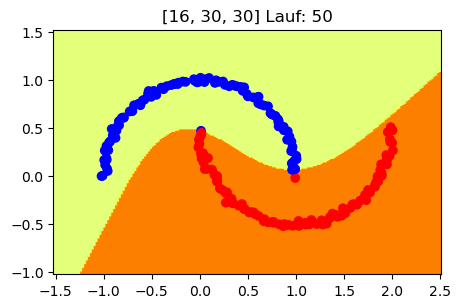

x 54 [16, 30, 30]
Accuracy: 1.0 [16, 30, 30]
Netz ist: [16, 30, 30] , solver: adam , activation: tanh , learning rate = 0.1 , von 1 bis 300


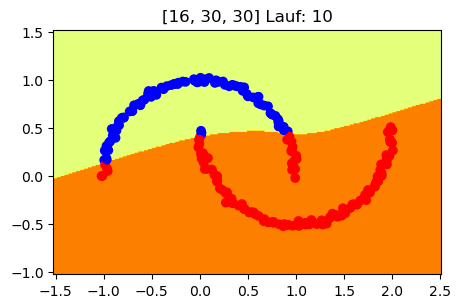

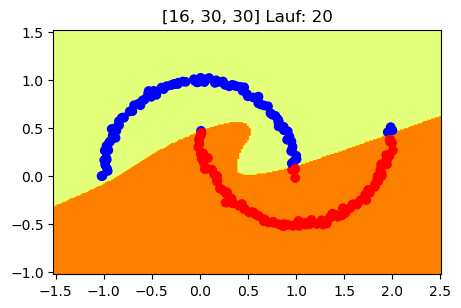

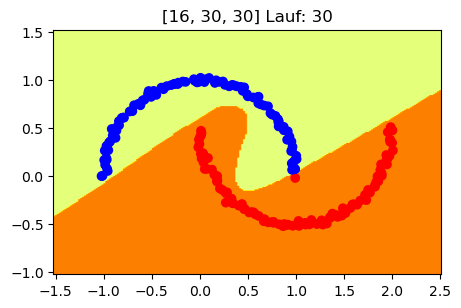

x 32 [16, 30, 30]
Accuracy: 1.0 [16, 30, 30]
Netz ist: [16, 30, 30] , solver: adam , activation: tanh , learning rate = 1 , von 1 bis 300


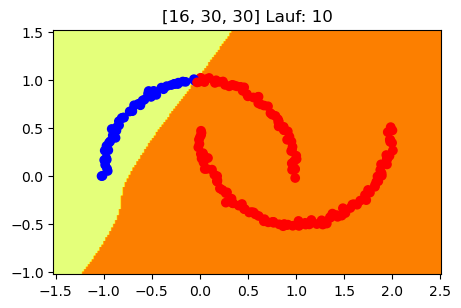

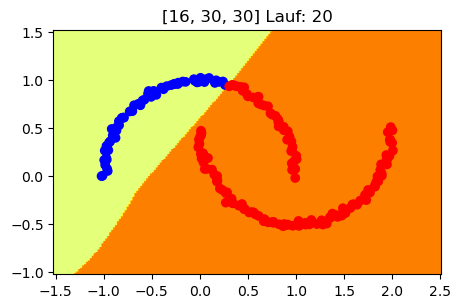

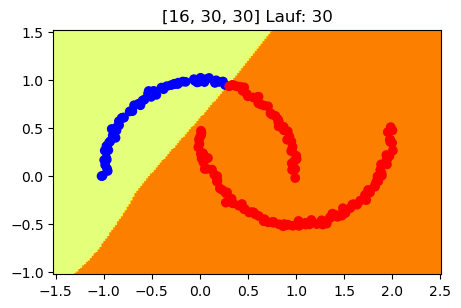

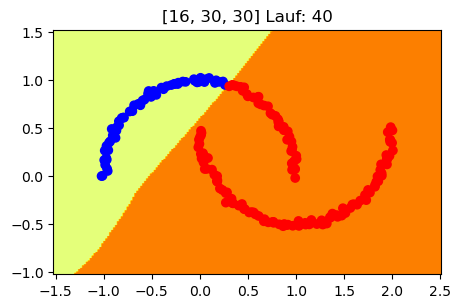

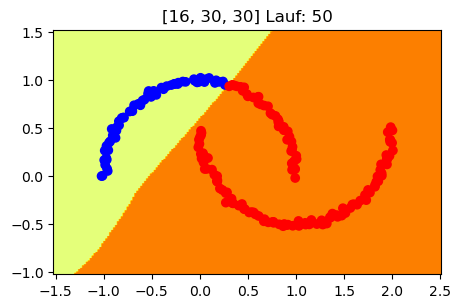

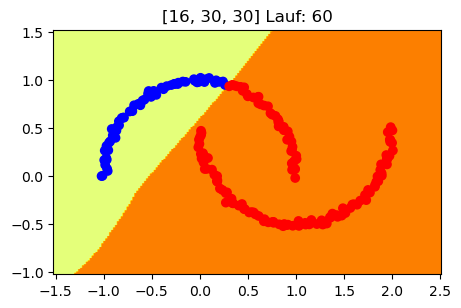

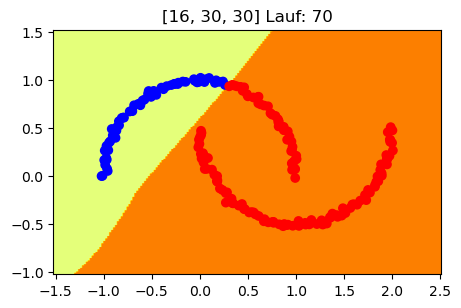

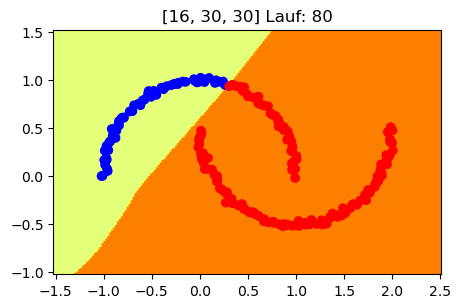

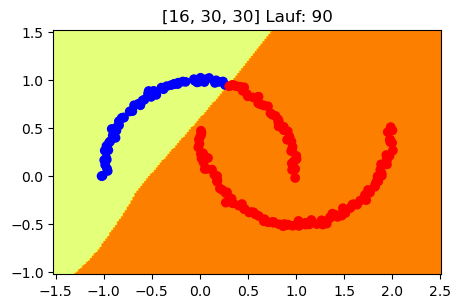

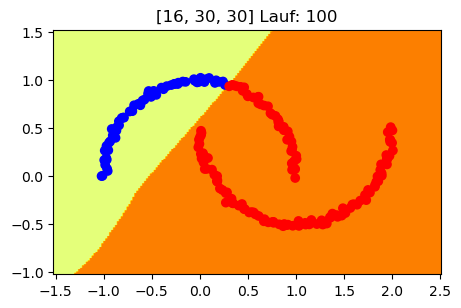

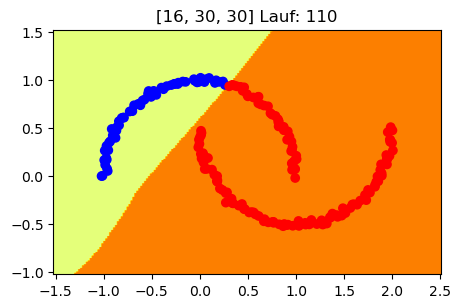

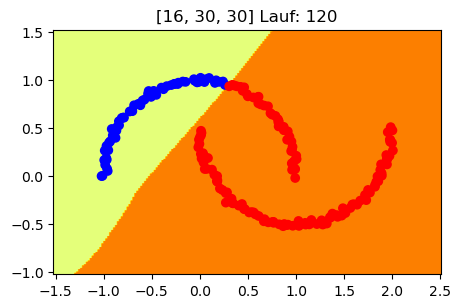

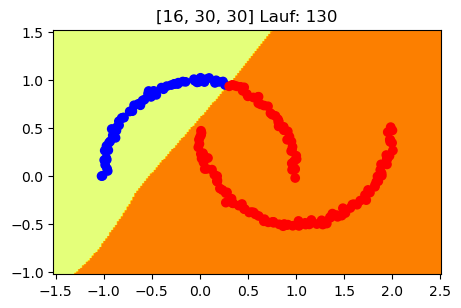

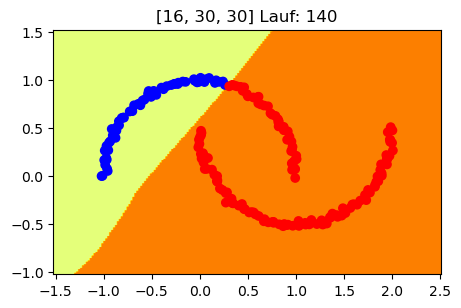

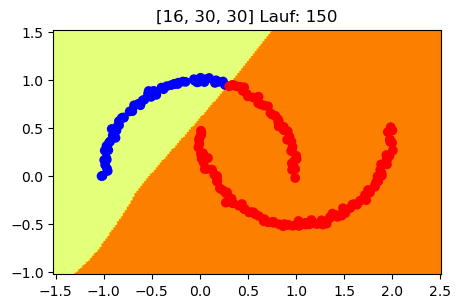

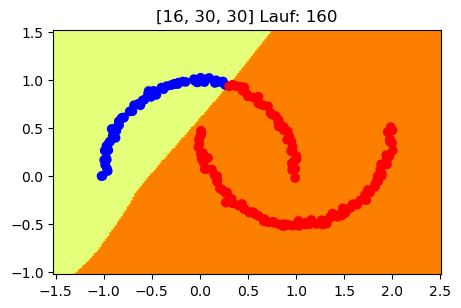

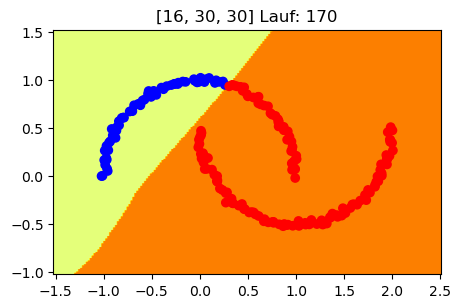

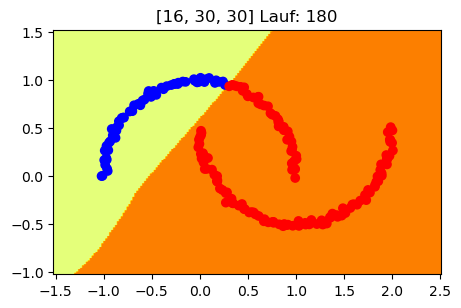

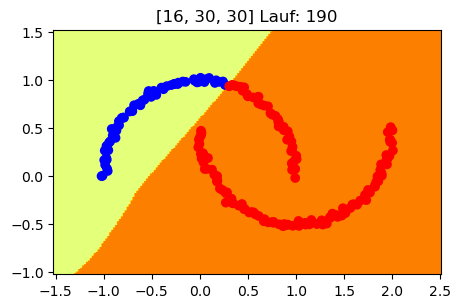

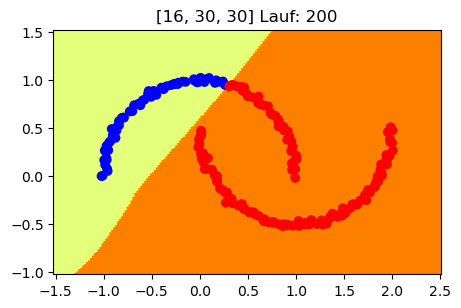

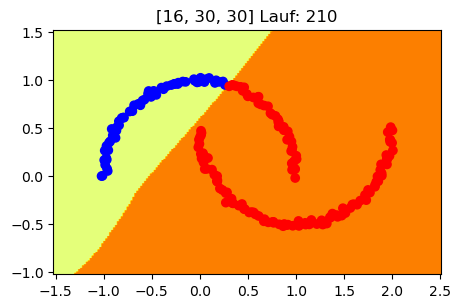

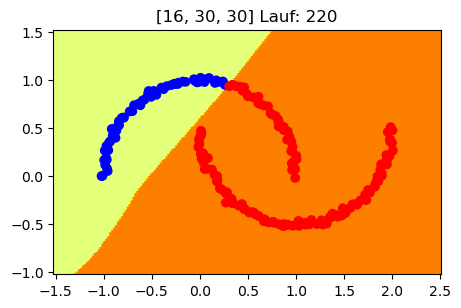

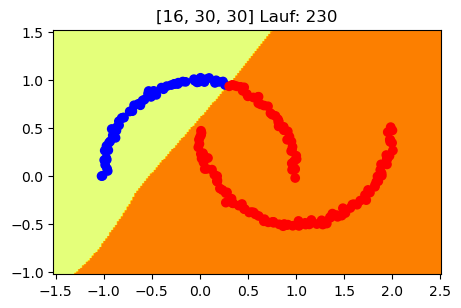

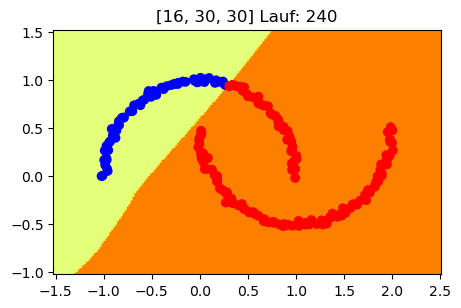

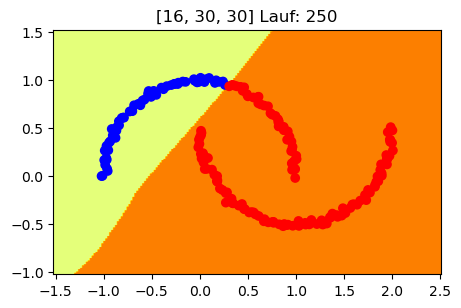

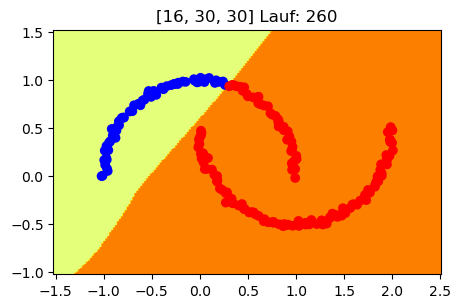

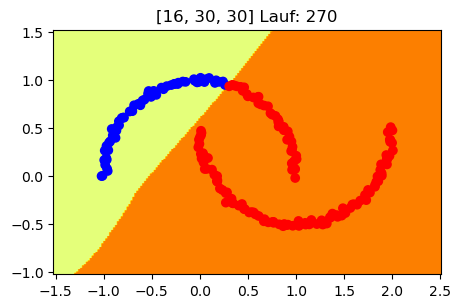

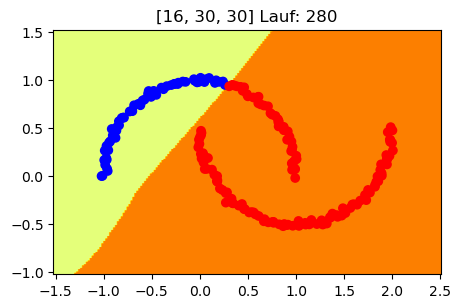

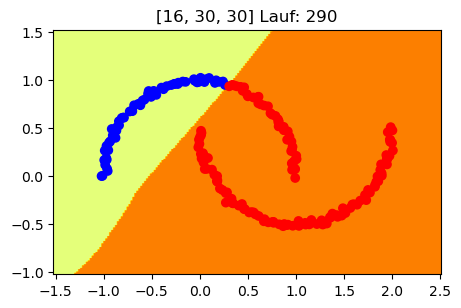

Accuracy: 0.795 [16, 30, 30]


In [32]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
def plot_background_image(f, xres=200, yres=200, extent = (-1.2,2.2,-1.2,2.2)):
    left,right,bottom,top = extent
    x_values=np.linspace(left,right,xres)
    y_values=np.linspace(bottom,top,yres)
    x1,y1=np.meshgrid(x_values,y_values)
    pixels=xres*yres
    x1 = x1.reshape(pixels,1)
    y1 = y1.reshape(pixels,1)
    X_grid=np.column_stack((x1, y1))
    Z=f(X_grid).reshape(xres,yres)
    plt.imshow(Z,origin="lower",extent=extent, cmap="Wistia")
#Plotgröße setzen (sonst unterschiedlich große Plots wenn plot_background_image nicht immer verwendet wird)
plt.rcParams["figure.figsize"]=5,5

X_train,y_train = datasets.make_moons(n_samples=200,noise=.02)
colormap=np.array(["blue","red"])

#geo=[int(x) for x in input("welche Form hat das Netz z.B. 5,3 ").split(",")]
#print(geo)
geo = [16,30,30]   



von=1
bis=200

solver="adam"
Xmin,Xmax,Ymin,Ymax=np.min(X_train[:,0])-.5,np.max(X_train[:,0])+.5,np.min(X_train[:,1])-.5,np.max(X_train[:,1])+.5
for lr in [0.0001,0.001,0.01,0.1,1]:
    print(f"Netz ist: {geo} , solver: adam , activation: tanh , learning rate = {lr} , von 1 bis 300")
    for x in range(von,bis): 

        clf = MLPClassifier(activation="tanh",solver=solver,hidden_layer_sizes=geo,random_state=1, max_iter=x,learning_rate_init=lr,learning_rate="constant").fit(X_train, y_train)

        result=clf.predict(X_train)
        result.reshape(200,1)
        if x%10==0:
            plot_background_image(clf.predict,extent=(Xmin,Xmax,Ymin,Ymax))
            plt.title(f"{geo} Lauf: {x}")
            plt.scatter(X_train[:,0],X_train[:,1],c=colormap[result])
            plt.show()
        if abs(clf.score(X_train,y_train)-1.0)<1e-6:
            print("x",x,geo)
            break

    print(f"Accuracy: {clf.score(X_train, y_train)} {geo}")
   

Es zeigt sich, dass das Netz in der an sich guten Struktur (16 ¦ 30 ¦ 30) mit relu und adam folgende Resultate ergibt:<br>

<table style=" width:80%; background-color: rgb(255, 165, 10); font-size: 16px">
<th style="vertical-align: top; text-align: center;">Lernrate
</th>
<th style="vertical-align: top; text-align: center;">Zahl Schritte<br>bis Accuracy = 100%
</th>

<tr>
<td style="vertical-align: top;text-align: center;"> 
0.0001
<td style="vertical-align: top;text-align: center;">
kein Erfolg
</td> 
 
</tr>
<tr>
<td style="vertical-align: top;text-align: center;"> 
0.001
<td style="vertical-align: top;text-align: center;">
kein Erfolg 
</td> 

</tr>
    <tr>
<td style="vertical-align: top;text-align: center;"> 
0.01
<td style="vertical-align: top;text-align: center;">
54
</td>
    </tr>   
    <tr>
<td style="vertical-align: top;text-align: center;"> 
0.1
<td style="vertical-align: top;text-align: center;">
32
</td>
    </tr> 
    <tr>
<td style="vertical-align: top;text-align: center;"> 
1
<td style="vertical-align: top;text-align: center;">
kein Erfolg
</td>
    </tr>   
</table>    
    
    
    
    
    
    
    
    
    
    
    
    
    


Die optimale Lernrate liegt also im Bereich von 0.01 und bereits bei 0.1 verschlechtert sich die Performance, um dann bei 1 dem "overshoot" Phaenomen zum Opfer zufallen.
<b> Zusammenfassend zeigt sich , dass der Erfolg des ML mit neuronalen Netzen mit der richtigen Adaptation der Hyperparameter steht und fällt.</b> 

Hier wollen wir uns noch einmal "life" ansehen, wie sich die Entscheidungsgrenze eines MLP-Netzes ändert, aber auch wie sich die Gewichte im Netz verändern. Wir haben ein Feld mit Halbmonden (500 Punkte). Dies wird von einem MLPClassifier mit der Struktur (2,8,8,2,1) gelernt. Sehen wir uns das an:<br> Die Entscheidungsgrenze ist klar zu sehen, aber auch die Netzgewichte. Rot bedeutet positiv, blau neagtiv. Die Linienbreite steht für die Grösse des Gewichts.

 125 Testdatensätze


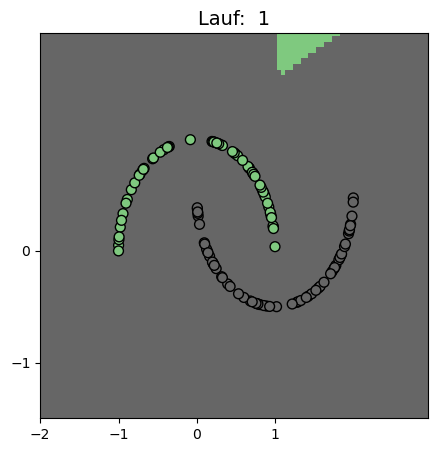

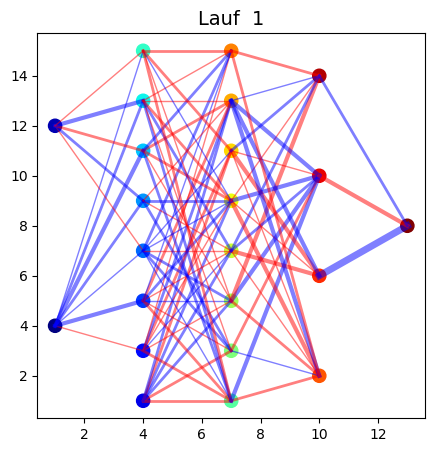

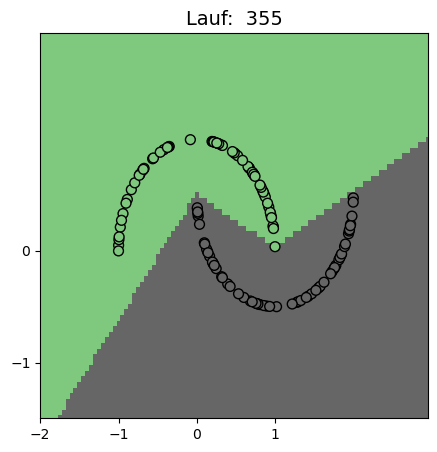

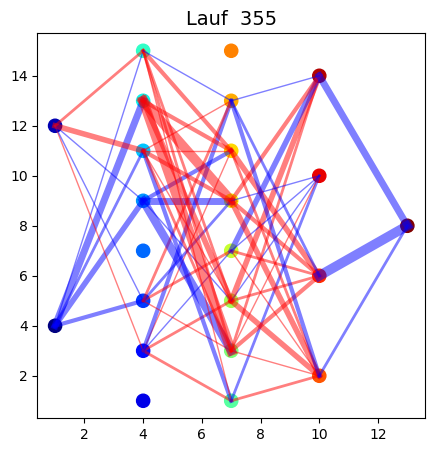

SystemExit: 

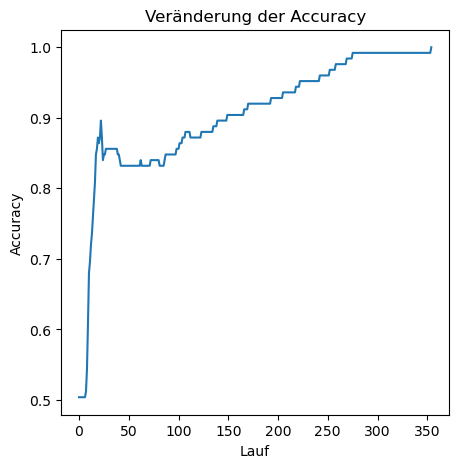

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore') 
def visualize_classifier(classifier,X,y,lab_x="",lab_y=""):
        
        
        min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
        min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
        # Define the step size to use in plotting the mesh grid 
        mesh_step_size = .05
     
        # Define the mesh grid of X and Y values 
        x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
        plt.scatter(x_vals,y_vals,s=1)
        output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
        output = output.reshape(x_vals.shape)
        plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.Accent)
    
    
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', linewidth=1, cmap=plt.cm.Accent)
        # Specify the boundaries of the plot 
        plt.xlim(x_vals.min(), x_vals.max()) 
        plt.ylim(y_vals.min(), y_vals.max()) 
     
        # Specify the ticks on the X and Y axes 
        plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
        plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
        plt.xlabel(lab_x,fontsize=14)
        plt.ylabel(lab_y,fontsize=14)
        
        return
def visualize_net(weights,hlsize,input_nr,output_nr,i):
    
#make nodes
    yzahl=[]
    yzahl.append(input_nr)
    yzahl.extend([num for num in hlsize])
    yzahl.append(output_nr)    
    maxanzahl=max(yzahl)*2    
    koordsx=[x for x in range(1,(len(hlsize)+2)*3,3)]
    the_nodes=[]
    counter=0
    for ynode in yzahl:
                    
        for index in range(0,ynode):
            ykoord=index*maxanzahl/ynode+maxanzahl/ynode/2
            #print(ykoord)
            the_nodes.append((koordsx[counter],ykoord))
        counter+=1    
    all_nodes=sum(hlsize)+output_nr+input_nr
    colors=np.arange(all_nodes)
    plt.scatter([x[0] for x in the_nodes],[y[1] for y in the_nodes],c=colors,s=90,cmap=plt.cm.jet)
    plt.title("Lauf  "+str(i),fontsize=14)
    #plt.savefig('my_plot'+str(i)+'.png')
#make edges
    counter=0
    edges=[]
    schichten=[]
    counter=0    
    for zahl in yzahl:
        schicht=[]
        zahl_neu=counter+zahl
        for elem in range(counter,zahl_neu):
            schicht.append(elem)
            counter+=1
        schichten.append(schicht)
    #print(schichten)
    for connect_index in range(len(schichten)-1):
        for elem in schichten[connect_index]:
            for elem1 in schichten[connect_index+1]:
                edges.append((elem,elem1))
    #print(edges)
    thickness=[]
    colors=[]
    
    #print(weights)
    for level in weights:
#        print(level)
#        print(80*"=")
        for elem in level:
#            print(elem)
#    
#            print(80*"-")
            for weight in elem:
#                print(weight)
                thickness.append(weight)
                if weight<0:
                    colors.append("blue")
                else:
                    colors.append("red")
    thickness=np.array(thickness)
    colors=np.array(colors)
    #sys.exit()
    
          
    for index,edge in enumerate(edges):
        #print(the_nodes[edge[0]][0],the_nodes[edge[1]][0],the_nodes[edge[0]][1],the_nodes[edge[1]][1])
        plt.plot((the_nodes[edge[0]][0],the_nodes[edge[1]][0]),(the_nodes[edge[0]][1],the_nodes[edge[1]][1]),lw=int(abs(thickness[index])*5),c=colors[index],alpha=.5)
     
    #plt.savefig('PNG/my_plot'+str(i)+'.png')
    plt.show() #hier net zeigen
   
    
    return
X, y = make_moons(n_samples=500, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
print(f" {len(X_test)} Testdatensätze")
the_scores=[]
for i in range(1,800):
    hlsize=(8,8,4)
    clf = MLPClassifier(random_state=1, max_iter=i, hidden_layer_sizes =hlsize).fit(X_train, y_train)
    
    if i == 1:
        visualize_classifier(clf,X_test,y_test)

        plt.title("Lauf:  "+str(i),fontsize=14)
        plt.savefig('PNG/my_dec_plot'+str(i)+'.png')
        plt.show()
        visualize_net(clf.coefs_,hlsize,len(X[0]),clf.n_outputs_,i)
    the_scores.append(clf.score(X_test,y_test))
    if clf.score(X_test,y_test)>.9999:
        visualize_classifier(clf,X_test,y_test)
    
        plt.title("Lauf:  "+str(i),fontsize=14)
        plt.savefig('PNG/my_dec_plot'+str(i)+'.png')
        plt.show()
        visualize_net(clf.coefs_,hlsize,len(X[0]),clf.n_outputs_,i)
        plt.title("Veränderung der Accuracy")
        plt.xlabel("Lauf")
        plt.ylabel("Accuracy")
        plt.plot(the_scores)
        sys.exit()

Hier das ganze animiert:

In [39]:
from IPython.display import HTML
#mit ezgif die gespeicherten pngs im PNG in mp4 verwandeln
HTML("""
    <video alt="test" controls>
        <source src="PNG/ezgif.com-gif-maker_dec.mp4" type="video/mp4">
    </video>
""")

In [40]:
from IPython.display import HTML
#mit ezgif die gespeicherten pngs im PNG in mp4 verwandeln
HTML("""
    <video alt="test" controls>
        <source src="PNG/ezgif.com-gif-maker.mp4" type="video/mp4">
    </video>
""")

Was passiert bei grösseren Aufgaben, versuchen wir es einmal mit MNIST.

In [5]:
#############lange Laufzeit#############
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
from sklearn.neural_network import MLPClassifier
import sys

    

with  open("Data/mnist_train_x","rb") as fh:
    X_train=pickle.load(fh)
with  open("Data/mnist_test_x","rb") as fh:
    X_test=pickle.load(fh)
with  open("Data/mnist_train_y","rb") as fh:
    Y_train=pickle.load(fh)
with  open("Data/mnist_test_y","rb") as fh:
    Y_test=pickle.load(fh)


random.seed(1)
def show_image(X,num):
    the_pixels=X_train[num]
    z=[]
    for i in range (28):
        line=[]
        for j in range(28):
            line.append((255-the_pixels[i*28+j]))
        z.append(line)        
    z=np.array(z)    
    plt.imshow(z,cmap="gray")
    plt.grid(False)
    return plt



train_len=30000 #60000
test_len=10000 #10000

Y_train=Y_train.reshape(60000,) 
Y_test=Y_test.reshape(10000,)

f_X_train=X_train[:train_len]
f_Y_train=Y_train[:train_len]
f_X_test=X_test[:train_len]
f_Y_test=Y_test[:train_len]

x=200
clf = MLPClassifier(activation="relu",solver="adam",\
        hidden_layer_sizes=(30,10),random_state=1, max_iter=x,learning_rate_init=.0008).fit(f_X_train,f_Y_train)
#result=clf.predict(f_X_train)
print(f"Accuracy Train: {clf.score(f_X_train, f_Y_train)}")    

result1=clf.predict(f_X_test)
print(f"Accuracy Test: {clf.score(f_X_test,f_Y_test)}")
with open("Data/mnist_predicted","wb") as fh:    
    pickle.dump(result1, fh)

Accuracy Train: 0.9909666666666667
Accuracy Test: 0.9405


Ein Ergebnis für den vollen Datensatz für Eilige:<br>


Accuracy: 0.9909333333333333 Train
Accuracy: 0.9547 Test

Hier ein paar der falschen Voraussagen.

 vorhergesagt: 1 label: 8 290


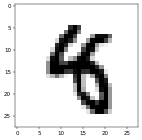

 vorhergesagt: 7 label: 2 321


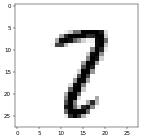

 vorhergesagt: 0 label: 6 445


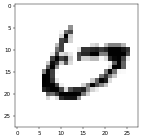

 vorhergesagt: 2 label: 8 582


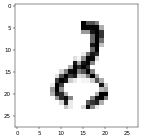

 vorhergesagt: 9 label: 7 689


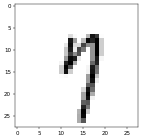

 vorhergesagt: 7 label: 2 924


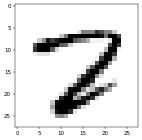

In [6]:
import pickle
from matplotlib.pyplot import figure
def show_image(X,num):
    
    the_pixels=X_test[num]
    z=[]
    for i in range (28):
        line=[]
        for j in range(28):
            line.append((255-the_pixels[i*28+j]))
        z.append(line)        
    z=np.array(z)    
    plt.imshow(z,cmap="gray")
    plt.grid(False)
    return plt
with open ("Data/mnist_predicted","rb") as fh:
    result=pickle.load(fh)

for i in [290,321,412,445,543,582,689,717,740,924,939]:
#for i in range(1000):
    
    if result[i]!=f_Y_test[i]:
        print(f" vorhergesagt: {result[i]} label: {f_Y_test[i]} {i}")
        figure(figsize = (4, 4), dpi = 40)
        plt1=show_image(f_X_test,i)
        plt1.show()
